<div class="alert alert-block alert-info">  

# **Binary classification**
</div>

Group 47 

Patrícia Braga Torres - 20201518  

Mafalda de Oliveira e Sousa Antunes - 20201565  

Mikołaj Jarząbkowski - 20230529  

Beatriz Leonardo Vasconcelos - 20230755 

Joana Coelho Gonçalves - 20230977  


## Table of contents
[<font color='#2f5496'>1. Data preprocessing</font>](#one-bullet) <br>
    [<font color='#2f5496'>1.2. Data visualization</font>](#two-bullet) <br>
    [<font color='#2f5496'>1.3. Transforming/organizing data</font>](#three-bullet) <br>
    [<font color='#2f5496'>1.4. Outliers</font>](#four-bullet) <br>
    [<font color='#2f5496'>1.4.1. Metric variables</font>](#five-bullet) <br>
    [<font color='#2f5496'>1.4.2. Non metric variables</font>](#six-bullet)        
    [<font color='#2f5496'>1.5. Missing Values</font>](#seven-bullet) <br>
    [<font color='#2f5496'>1.6. Feature engineering</font>](#eight-bullet) <br>

[<font color='#2f5496'>2. Feature selection</font>](#nine-bullet) <br>
    [<font color='#2f5496'>2.1. Mutual information</font>](#ten-bullet) <br>
    [<font color='#2f5496'>2.2. Boruta</font>](#eleven-bullet) <br>
    [<font color='#2f5496'>2.3. Ridge regression</font>](#twelve-bullet) <br>
    [<font color='#2f5496'>2.4. RFE</font>](#13-bullet) <br>
    [<font color='#2f5496'>2.5. Select K Best</font>](#14-bullet) <br>
    [<font color='#2f5496'>2.6. Random Forest</font>](#15-bullet) <br>
    [<font color='#2f5496'>2.7. LASSO regression</font>](#16-bullet) <br>

[<font color='#2f5496'>3. Model testing</font>](#17-bullet) <br>
    [<font color='#2f5496'>3.1. Random Forest</font>](#18-bullet) <br>
    [<font color='#2f5496'>3.2. AdaBoost</font>](#19-bullet) <br>
    [<font color='#2f5496'>3.3. Decision Tree</font>](#20-bullet) <br>
    [<font color='#2f5496'>3.4. Neural Network</font>](#21-bullet) <br>
    [<font color='#2f5496'>3.5. Extra Trees</font>](#22-bullet) <br>
    [<font color='#2f5496'>3.6. K Neighbors</font>](#23-bullet) <br>
    [<font color='#2f5496'>3.7. Logistic Regression</font>](#24-bullet) <br>
    [<font color='#2f5496'>3.8. Hist Gradient Boosting</font>](#25-bullet) <br>
    [<font color='#2f5496'>3.9. Bagging</font>](#26-bullet) <br>
    [<font color='#2f5496'>3.10. Support Vector Machine</font>](#27-bullet) <br>
    [<font color='#2f5496'>3.11. Naive Bayes</font>](#28-bullet) <br>
    [<font color='#2f5496'>3.12. Stacking</font>](#29-bullet) <br>
    [<font color='#2f5496'>3.13. Random Forest with grid search, stratified k fold and cross val</font>](#30-bullet) <br>
    [<font color='#2f5496'>3.14. Hist Gradient Boosting with grid search, stratified k fold and cross val</font>](#31-bullet) <br>
    [<font color='#2f5496'>3.15. Extra Trees with grid search, stratified k fold and cross val</font>](#32-bullet) <br>
    [<font color='#2f5496'>3.16. Neural Networks with grid search, stratified k fold and cross val</font>](#33-bullet) <br>
    [<font color='#2f5496'>3.15. Stacking with stratified k fold and cross val</font>](#34-bullet) <br>

[<font color='#2f5496'>4. Test predictions</font>](#35-bullet) <br>

### Imports

In [2]:
# Working with data
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, RobustScaler
# from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler

# Tools for visualizations
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from math import ceil

# Feature selection
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_selection import RFE, SelectKBest, RFECV, f_classif
from sklearn.linear_model import LogisticRegression, LassoCV
import scipy.stats as stats
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import Ridge
#%pip install boruta
from boruta import BorutaPy

# Models
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
#from sklearn.neighbors import KNeighborsClassifier
from  sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, BaggingClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">
<a class="anchor" id="one-bullet">     

# 1. Data preprocessing
</a>    
</div>

<div class="alert alert-block alert-success">
<a class="anchor" id="two-bullet">    

## 1.2. Data exploration
 </a>
    
</div>

In [3]:
data = pd.read_csv('train.csv', index_col ='encounter_id', na_values=['?', '[]'])

In [4]:
data.tail().T

encounter_id,660160,826429,332030,757560,459757
country,USA,USA,USA,USA,USA
patient_id,24531381,4663818,23397147,52161750,88410897
race,AfricanAmerican,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[80-90),[70-80),[60-70),[60-70),[70-80)
weight,NaN,NaN,NaN,NaN,NaN
payer_code,MC,NaN,NaN,BC,BC
outpatient_visits_in_previous_year,0,0,0,0,0
emergency_visits_in_previous_year,1,0,2,0,0
inpatient_visits_in_previous_year,0,0,2,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71236 entries, 533253 to 459757
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   country                                71236 non-null  object
 1   patient_id                             71236 non-null  int64 
 2   race                                   66166 non-null  object
 3   gender                                 71236 non-null  object
 4   age                                    67679 non-null  object
 5   weight                                 2246 non-null   object
 6   payer_code                             43035 non-null  object
 7   outpatient_visits_in_previous_year     71236 non-null  int64 
 8   emergency_visits_in_previous_year      71236 non-null  int64 
 9   inpatient_visits_in_previous_year      71236 non-null  int64 
 10  admission_type                         67530 non-null  object
 11  medical_specia

In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,71236,1,USA,71236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
patient_id,71236.0,NaN,NaN,NaN,54302279.330984,38795850.347332,135.0,23396510.25,45305631.0,87558374.25,189502619.0
race,66166,5,Caucasian,50693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,71236,3,Female,38228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,67679,10,[70-80),17359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,2246,9,[75-100),933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payer_code,43035,17,MC,22683,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outpatient_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.369588,1.287469,0.0,0.0,0.0,0.0,42.0
emergency_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.196249,0.910854,0.0,0.0,0.0,0.0,76.0
inpatient_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.640154,1.267271,0.0,0.0,0.0,1.0,21.0


<Axes: >

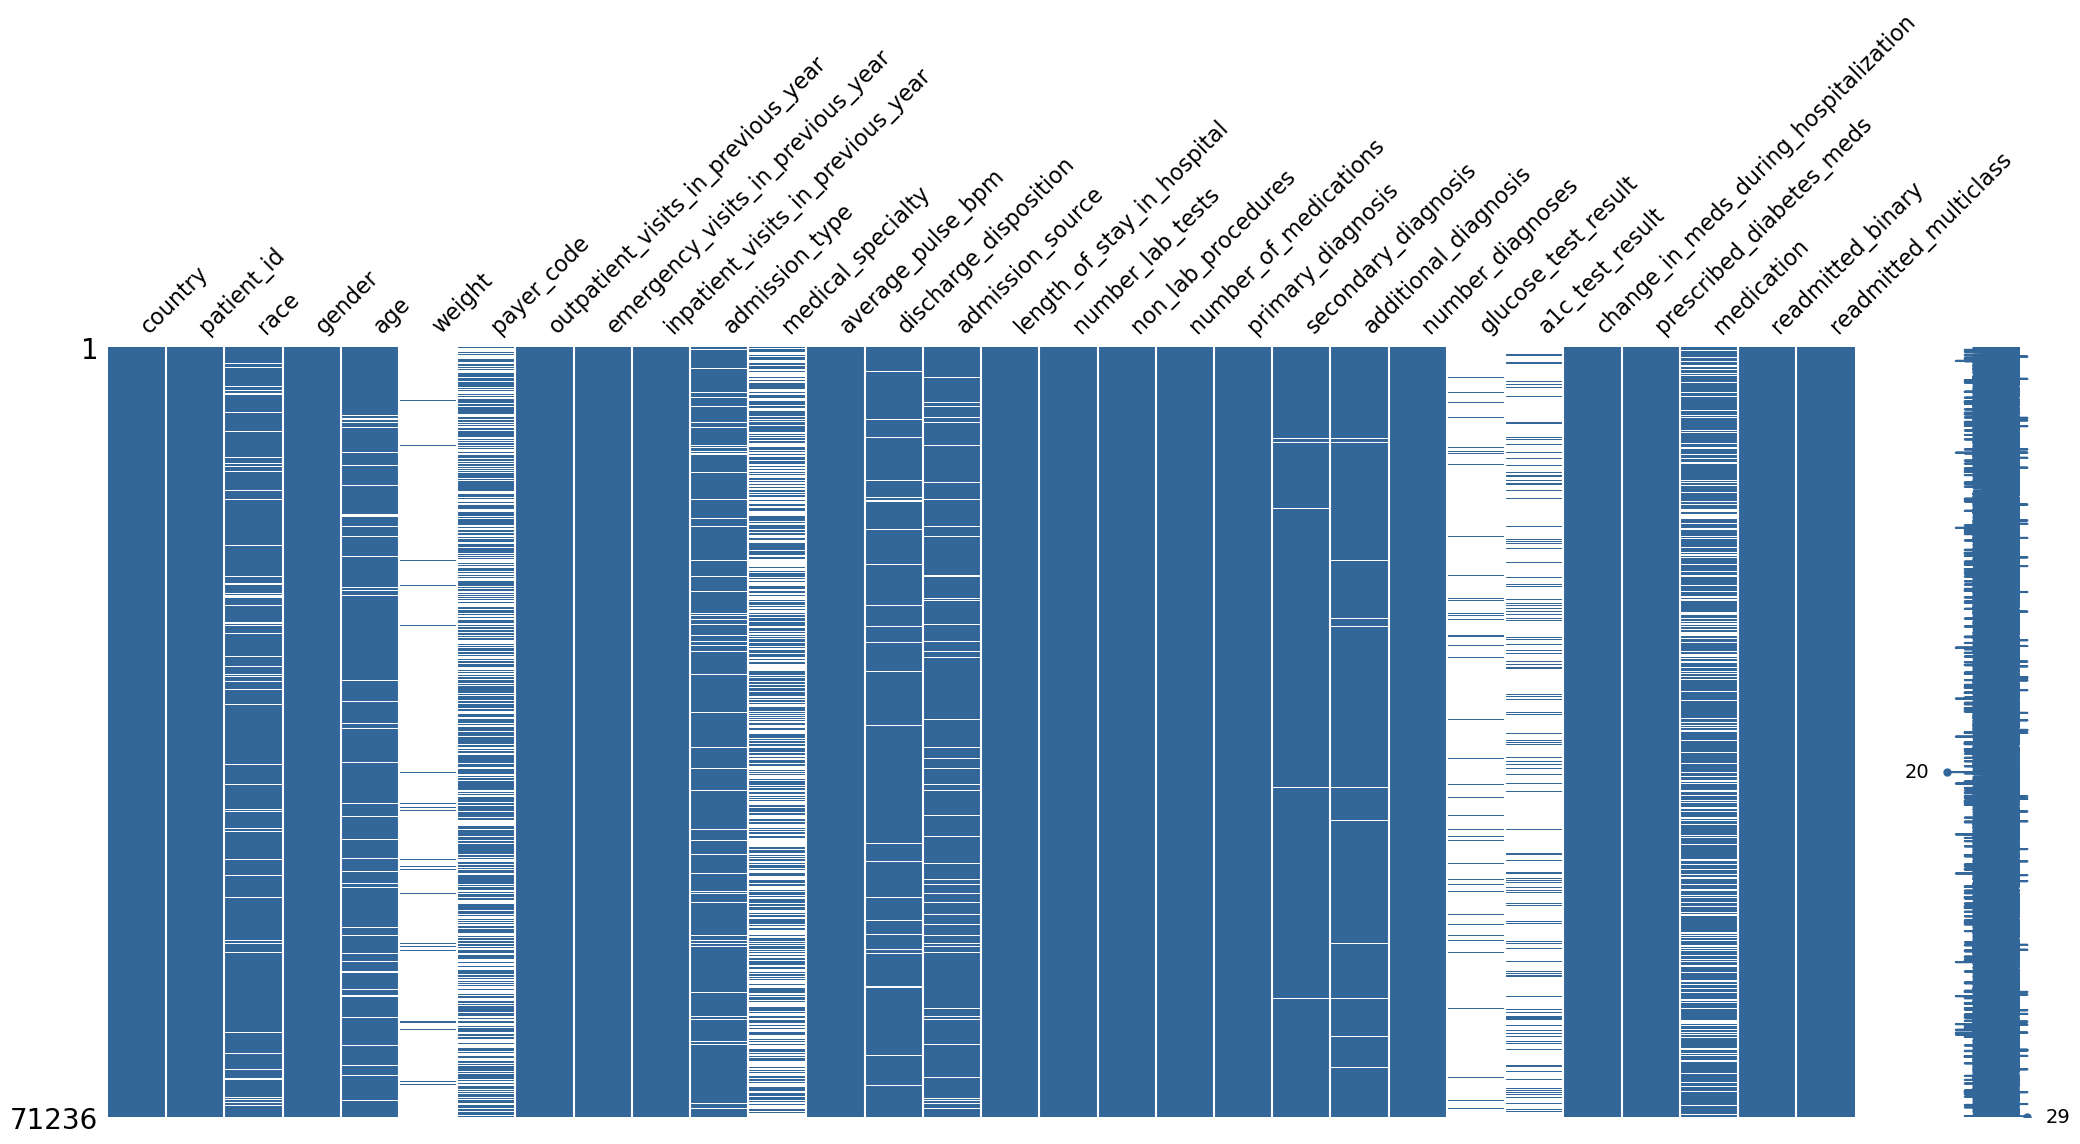

In [7]:
# Bar chart showing missing values
msno.matrix(data, color=(0.2, 0.4, 0.6))

In [8]:
# No duplicated rows
data.duplicated().sum()

0

In [9]:
data['readmitted_binary'].value_counts(normalize=True)

readmitted_binary
No     0.888399
Yes    0.111601
Name: proportion, dtype: float64

### <mark> Classes very imbalanced!

<div class="alert alert-block alert-success">
<a class="anchor" id="three-bullet">    

## 1.3. Transforming/organizing data
 </a>
    
</div>

In [10]:
# Renaming variables
new_names = {'outpatient_visits_in_previous_year':'outpatient_visits',
             'emergency_visits_in_previous_year':'emergency_visits',
             'inpatient_visits_in_previous_year': 'inpatient_visits',
             'length_of_stay_in_hospital':'length_of_stay',
             'change_in_meds_during_hospitalization':'change_in_meds'
            }
data = data.rename(columns=new_names)

In [11]:
# Variables for metric and non metric features
metric_feats = ['outpatient_visits', 'emergency_visits', 'inpatient_visits', 'average_pulse_bpm', 'length_of_stay', 'number_lab_tests', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses', 'patient_id']
non_metric_feats = ['payer_code','glucose_test_result', 'a1c_test_result', 'gender', 'change_in_meds', 'prescribed_diabetes_meds', 'race', 'age', 'admission_type', 'discharge_disposition', 'admission_source', 'primary_diagnosis', 'secondary_diagnosis','additional_diagnosis', 'medication', 'country', 'weight', 'medical_specialty']

<div class="alert alert-block alert-success">
<a class="anchor" id="four-bullet">    

## 1.4. Outliers
 </a>
    
</div>

<div class="alert alert-block alert-success">
<a class="anchor" id="five-bullet">    

### 1.4.1. Metric variables
 </a>
    
</div>

#### Visualization of distributions

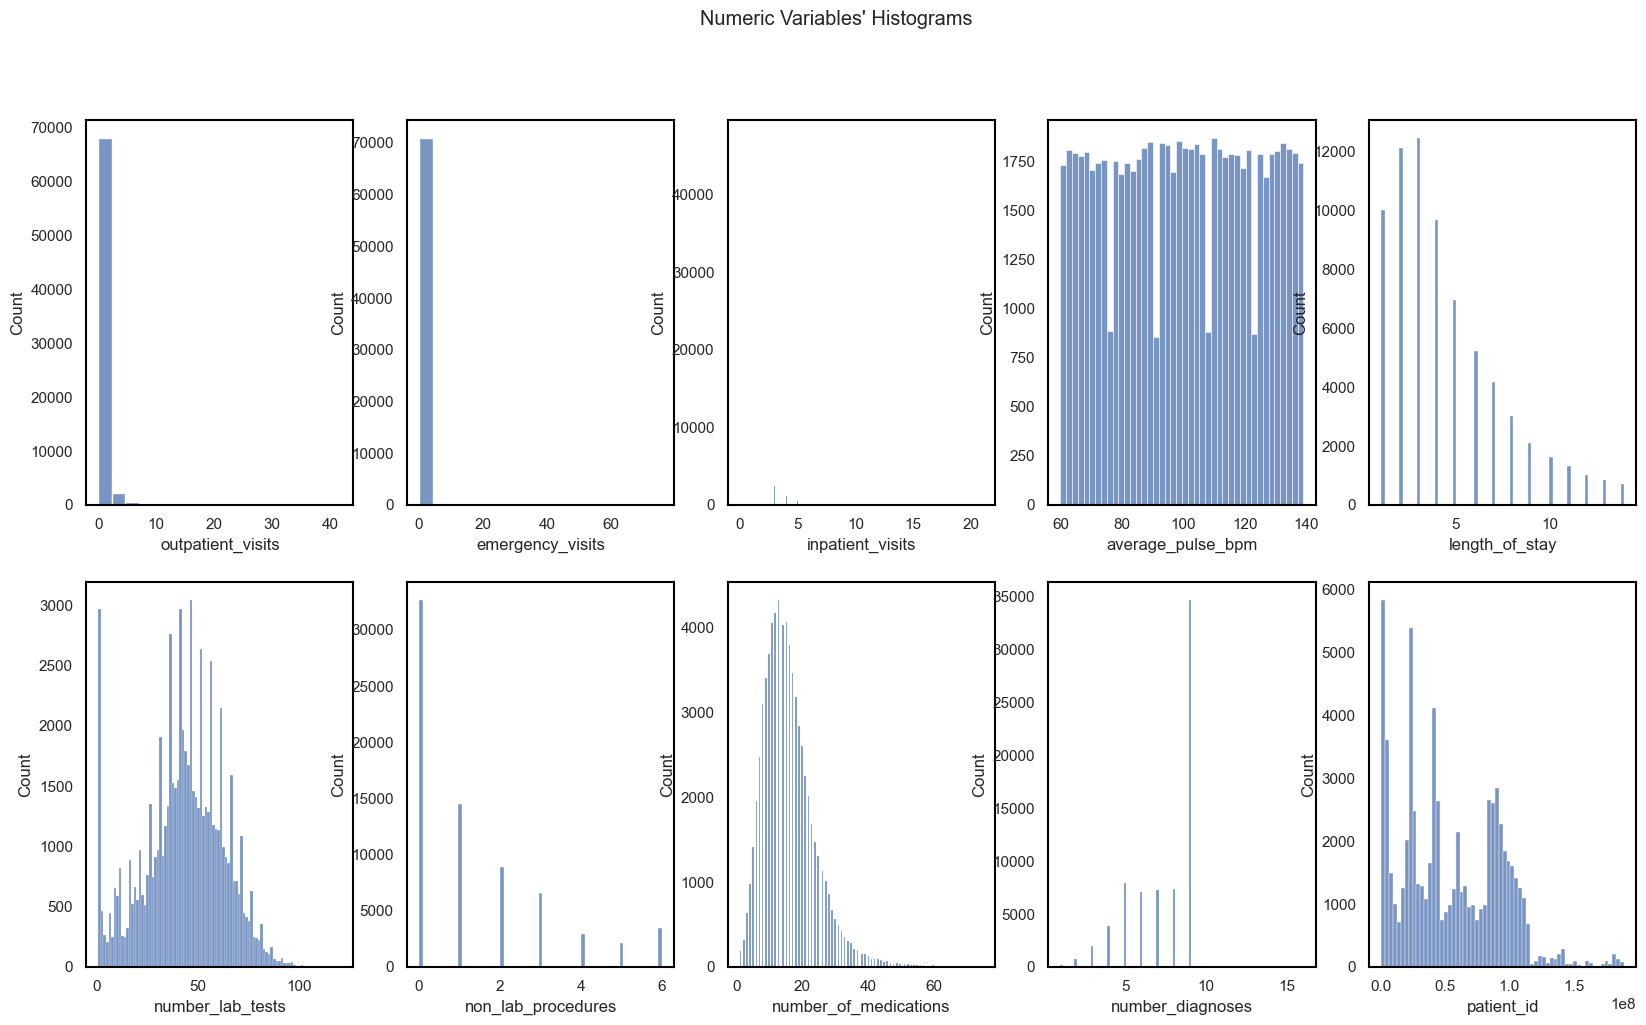

In [12]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_feats) / 2), figsize=(20, 11))

for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor('white') # White background
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Frame color
            spine.set_linewidth(1.5) 
            
# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_feats):
    sns.histplot(x=data[feat], ax=ax)
    
# Layout
title = "Numeric Variables' Histograms"
plt.suptitle(title)
plt.show()

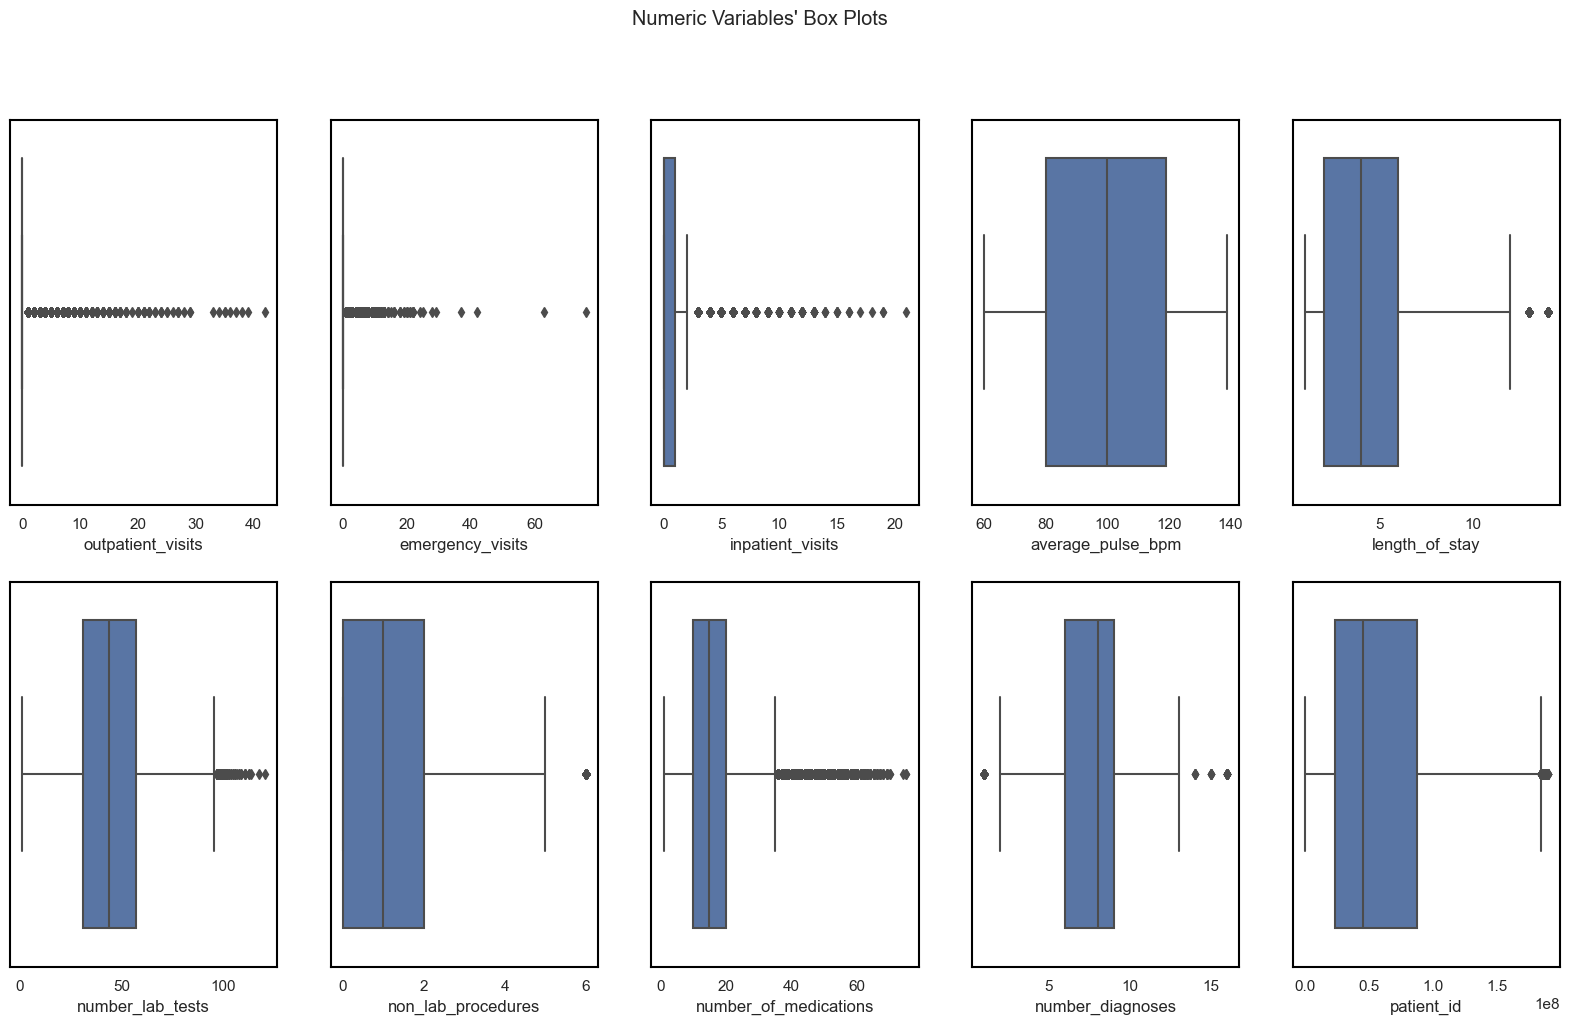

In [13]:
# Boxplots to visualise outliers
sns.set()
fig, axes = plt.subplots(2, ceil(len(metric_feats) / 2), figsize=(20, 11))

for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor('white') # White background
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Frame color
            spine.set_linewidth(1.5) 

for ax, feat in zip(axes.flatten(), metric_feats):
    sns.boxplot(x=data[feat], ax=ax)
    
title = "Numeric Variables' Box Plots"
plt.suptitle(title)
plt.show()

### Transformations

In [14]:
#in the variables that have the distributions right skewed 
feats_to_log = ['outpatient_visits', 'emergency_visits', 'inpatient_visits', 'length_of_stay', 'non_lab_procedures', 'number_of_medications']
# Log transformation of metric features
data[feats_to_log] = np.log1p(data[feats_to_log])

# Square transformation of 'number_diagnoses'
data['number_diagnoses'] = data['number_diagnoses']^2

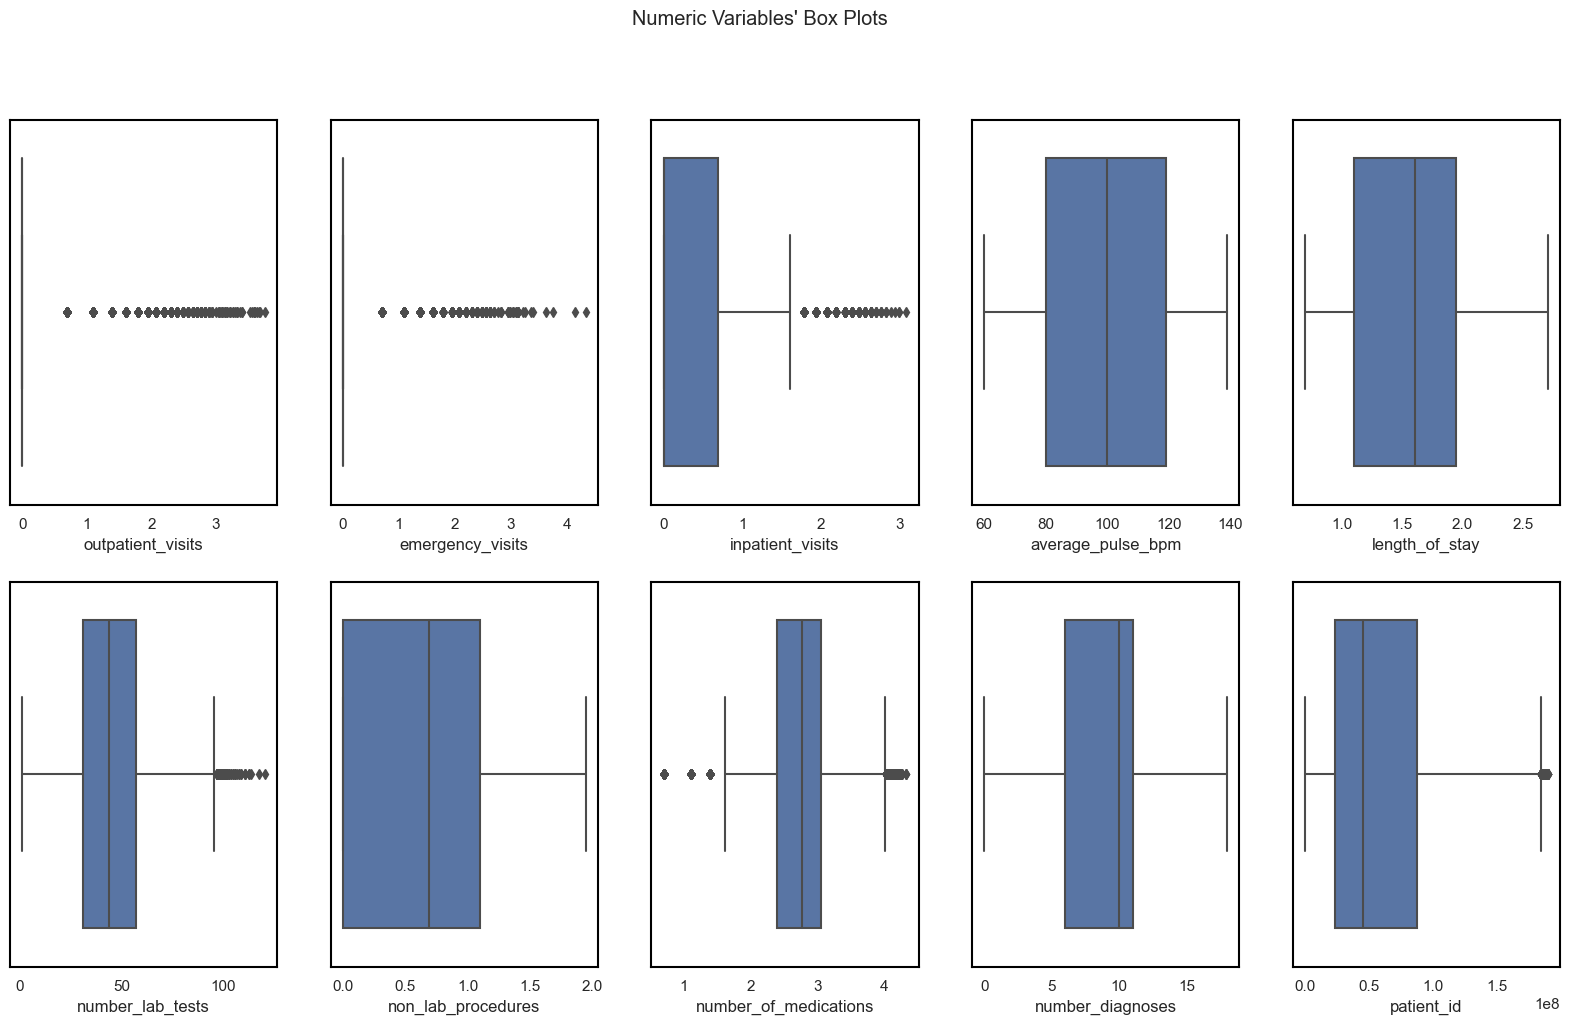

In [15]:
# Boxplots to visualise outliers
# we need to visualie again to see the differences from the log transformations
sns.set()
fig, axes = plt.subplots(2, ceil(len(metric_feats) / 2), figsize=(20, 11))

for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor('white') # White background
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Frame color
            spine.set_linewidth(1.5) 

for ax, feat in zip(axes.flatten(), metric_feats):
    sns.boxplot(x=data[feat], ax=ax)
    
title = "Numeric Variables' Box Plots"
plt.suptitle(title)
plt.show()

In [16]:
# msno.matrix(data, color=(0.2, 0.3, 0.7))

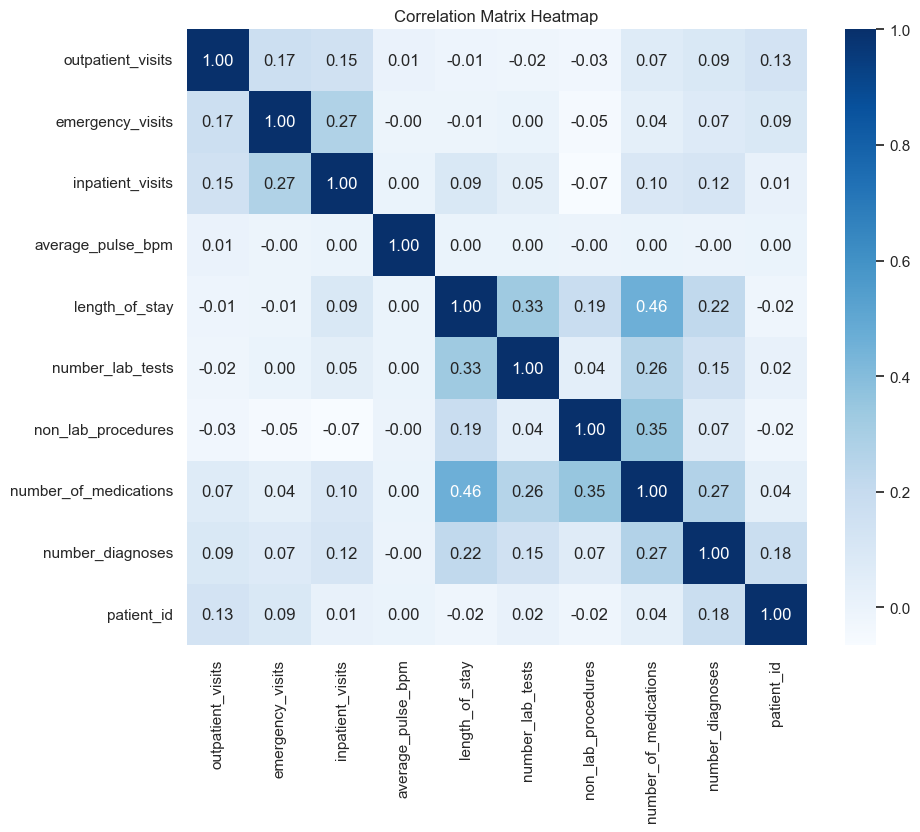

In [17]:
# Correlation Matrix
correlation_matrix = data[metric_feats].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

Correlation coefficients whose magnitude are between **_0.7 and 0.9_** indicate variables which can be considered <mark>highly correlated</mark>. Correlation coefficients whose magnitude are between **0.5 and 0.7** indicate variables which can be considered <mark>moderately correlated</mark>.

<mark>In the following heatmap the only values that are somewhat related are number_of_medications and length_of_stay, but considering that the value is only **0.46**, taking these values into account would be too far-fetched.</mark>

In [18]:
# average_pulse_bpm isn't correlated with any of the other variables. Therefore, can be dropped since it doesn't provide usefull information 
data.drop('average_pulse_bpm', axis=1, inplace=True)

metric_feats.remove('average_pulse_bpm')

#### Outliers removal for Metric Variables

Metric features have no missing values, so we can proceed to outlier removal.

_Removing outliers using **Z-Score**._

In [19]:
df_zz = data[metric_feats].copy()
z = np.abs(stats.zscore(df_zz))
threshold = 3
df_zzz = df_zz[(z < 3).all(axis=1)]

print(df_zz.shape)
print(df_zzz.shape)
print("Numbers of rows deleted:", df_zz.shape[0]-df_zzz.shape[0], "\nThat makes", np.round(((df_zz.shape[0]-df_zzz.shape[0])/df_zz.shape[0])*100, 2), "% of the data.")


(71236, 9)
(65358, 9)
Numbers of rows deleted: 5878 
That makes 8.25 % of the data.


_Removing outliers using **IQR Score**._

IQL Score is a variable option of outliers removal only if there is more than one dataset, so we can ignore that. Should we write about it in report??

In [20]:
df_aa = data[metric_feats].copy()

Q1 = df_aa.quantile(0.25)
Q3 = df_aa.quantile(0.75)
IQR = Q3 - Q1
df_aaa = df_aa[~((df_aa < (Q1 - 1.5 * IQR)) |(df_aa > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_aa.shape)
print(df_aaa.shape)
print("Numbers of rows deleted:", df_aa.shape[0]-df_aaa.shape[0], "\nThat makes", np.round(((df_aa.shape[0]-df_aaa.shape[0])/df_aa.shape[0])*100, 2), "% of the data.")

(71236, 9)
(52448, 9)
Numbers of rows deleted: 18788 
That makes 26.37 % of the data.


<mark>Removing too many outliers, can't take that into consideration</mark>

_Removing outliers using **Visual Inspection**._

In [21]:
df_out = data.copy()

filters = (
    (df_out['number_diagnoses']<14) 
    & (df_out['number_of_medications']<4)
    & (df_out['number_lab_tests']<=100)
    & (df_out['inpatient_visits']<=2) 
    & (df_out['emergency_visits']<3) 
    & (df_out['outpatient_visits']<2) 
)

data_1 = df_out[filters]
print('Percentage of data kept after removing outliers:', np.round(data_1.shape[0] / data.shape[0], 4))

Percentage of data kept after removing outliers: 0.9822


In [22]:
data = data_1.copy()

<mark>The best result we will keep this option</mark>

<div class="alert alert-block alert-success">
<a class="anchor" id="six-bullet">    

### 1.4.2. Non metric features
 </a>
    
</div>

**Mapping Age**

In [23]:
data[non_metric_feats].dtypes

payer_code                  object
glucose_test_result         object
a1c_test_result             object
gender                      object
change_in_meds              object
prescribed_diabetes_meds    object
race                        object
age                         object
admission_type              object
discharge_disposition       object
admission_source            object
primary_diagnosis           object
secondary_diagnosis         object
additional_diagnosis        object
medication                  object
country                     object
weight                      object
medical_specialty           object
dtype: object

In [24]:
# Encode 'age', but preserve nans, for later imputation

def map_to_age(age):
    if age == '[0-10)':
        return 10
    elif age == '[10-20)':
        return 20
    elif age == '[20-30)':
        return 30
    elif age == '[30-40)':
        return 40
    elif age == '[40-50)':
        return 50
    elif age == '[50-60)':
        return 60
    elif age == '[60-70)':
        return 70
    elif age == '[70-80)':
        return 80
    elif age == '[80-90)':
        return 90
    elif age == '[90-100)':
        return 100
    else:
        return np.nan

In [25]:
data['age'] = data['age'].apply(map_to_age).astype(float)

**Mapping Diagnosis Features**

In [26]:
# Create function to apply classes of diseases to diagnosis features
def map_to_class(diagnosis_feature):
    if diagnosis_feature.startswith('V'):
        return 18
    elif diagnosis_feature.startswith('E'):
        return 19
    else:
        number = float(diagnosis_feature)

        if number < 140:
            return 1
        elif number < 240:
            return 2
        elif number < 280:
            return 3
        elif number < 290:
            return 4
        elif number < 320:
            return 5
        elif number < 390:
            return 6
        elif number < 460:
            return 7
        elif number < 520:
            return 8
        elif number < 580:
            return 9
        elif number < 630:
            return 10
        elif number < 680:
            return 11
        elif number < 710:
            return 12
        elif number < 740:
            return 13
        elif number < 760:
            return 14
        elif number < 780:
            return 15
        elif number < 800:
            return 16
        elif number < 1000:
            return 17
        else:
            return np.nan


In [27]:
data['primary_diagnosis'] = data['primary_diagnosis'].astype(str).apply(map_to_class)
data['secondary_diagnosis'] = data['secondary_diagnosis'].astype(str).apply(map_to_class)
data['additional_diagnosis'] = data['additional_diagnosis'].astype(str).apply(map_to_class)

**Mapping Discharged Dispostion**

In [28]:
def group_discharge(discharge_disposition):
    home_keywords = ['Discharged to home', 'Discharged/transferred to home with home health service', 'Discharged/transferred to home under care of Home IV provider']
    
    long_term_care_keywords = ['Discharged/transferred to a long term care hospital.', 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.']
    
    expired_hospice_keywords = ['Expired', 'Hospice / medical facility', 'Hospice / home', 'Expired at home. Medicaid only, hospice.', 'Expired in a medical facility. Medicaid only, hospice.']
    
    short_term_care_keywords = ['Discharged/transferred to another short term hospital', 'Discharged/transferred to another rehab fac including rehab units of a hospital .', 'Discharged/transferred to another type of inpatient care institution', 'Discharged/transferred to ICF', 'Left AMA']
    
    psychiatric_keywords = ['Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital']
    
    other_keywords = ['Discharged/transferred to SNF', 'Still patient or expected to return for outpatient services', 'Not Mapped', 'Discharged/transferred within this institution to Medicare approved swing bed', 'Admitted as an inpatient to this hospital' 'Discharged/transferred/referred to this institution for outpatient services', 'Neonate discharged to another hospital for neonatal aftercare', 'Discharged/transferred/referred another institution for outpatient services', 'Discharged/transferred to a federal health care facility.']

    if discharge_disposition in home_keywords:
        return 1 #'Grouped by Home'
    elif discharge_disposition in long_term_care_keywords:
        return 2 #'Grouped by Long-term Care'
    elif discharge_disposition in expired_hospice_keywords:
        return 3 #'Grouped by Expired/Hospice'
    elif discharge_disposition in short_term_care_keywords:
        return 4 #'Grouped by Short-term Care'
    elif discharge_disposition in psychiatric_keywords:
        return 5 #'Grouped by Psychiatric'
    elif discharge_disposition in other_keywords:
        return 6 #'Other'
    else:
        return np.nan 

In [29]:
data['discharge_disposition'] = data['discharge_disposition'].apply(group_discharge)

**Mapping admission source**

In [30]:
def group_ad_source(admission_source):
    admission_source = admission_source.strip()  # Remove leading/trailing whitespaces
    transfer_keywords = [  
        'Transfer from a hospital',
        'Transfer from a Skilled Nursing Facility (SNF)',
        'Transfer from another health care facility',
        'Transfer from Ambulatory Surgery Center',
        'Transfer from critial access hospital',
        'Transfer from hospital inpt/same fac rest in a sep claim'
    ]

    if admission_source in ['Clinic Referral', 'HMO Referral', 'Physician Referral']:
        return 1 #'Referral'
    elif admission_source in ['Court/Law Enforcement', 'Emergency Room']:
        return 2 #'Emergency'
    elif admission_source in ['Extramural Birth', 'Normal Delivery', 'Sick Baby']:
        return 3 #'Other'
    elif admission_source in transfer_keywords:
        return 4 #'Transfer'
    elif admission_source in ['Not Available', 'Not Mapped']:
        return 5
    else:
        return np.nan

In [31]:
data['admission_source'] = data['admission_source'].astype(str).apply(group_ad_source)

#### Visualization of distributions

In [32]:
data.isna().sum()

country                         0
patient_id                      0
race                         4998
gender                          0
age                          3491
weight                      67782
payer_code                  27875
outpatient_visits               0
emergency_visits                0
inpatient_visits                0
admission_type               3644
medical_specialty           34263
discharge_disposition        2589
admission_source             4663
length_of_stay                  0
number_lab_tests                0
non_lab_procedures              0
number_of_medications           0
primary_diagnosis              16
secondary_diagnosis           261
additional_diagnosis          999
number_diagnoses                0
glucose_test_result         66335
a1c_test_result             58226
change_in_meds                  0
prescribed_diabetes_meds        0
medication                  16114
readmitted_binary               0
readmitted_multiclass           0
dtype: int64

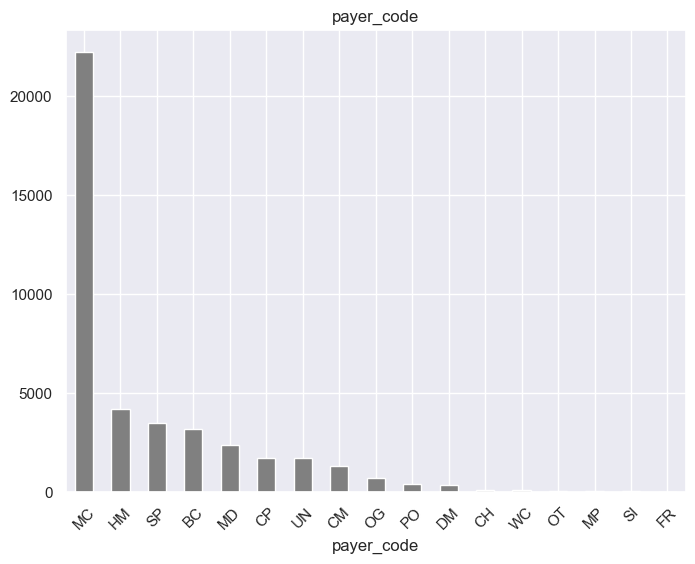

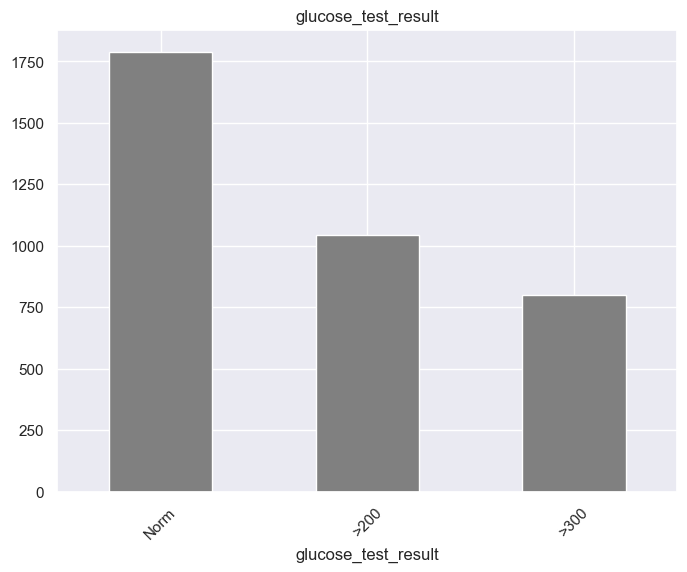

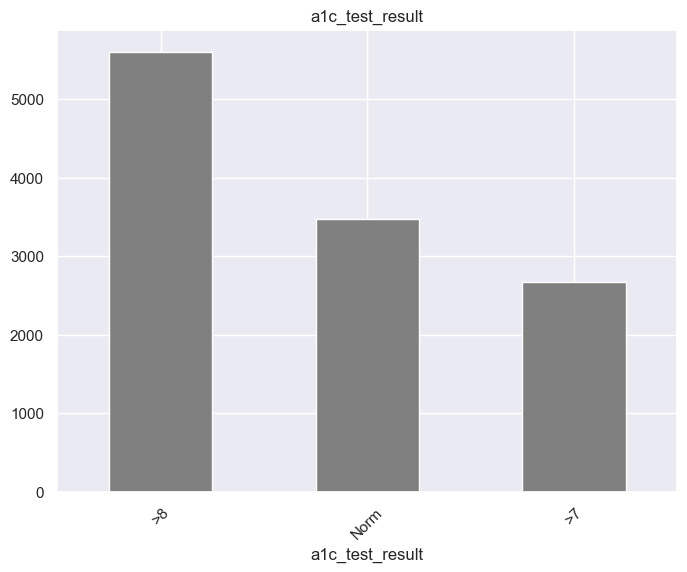

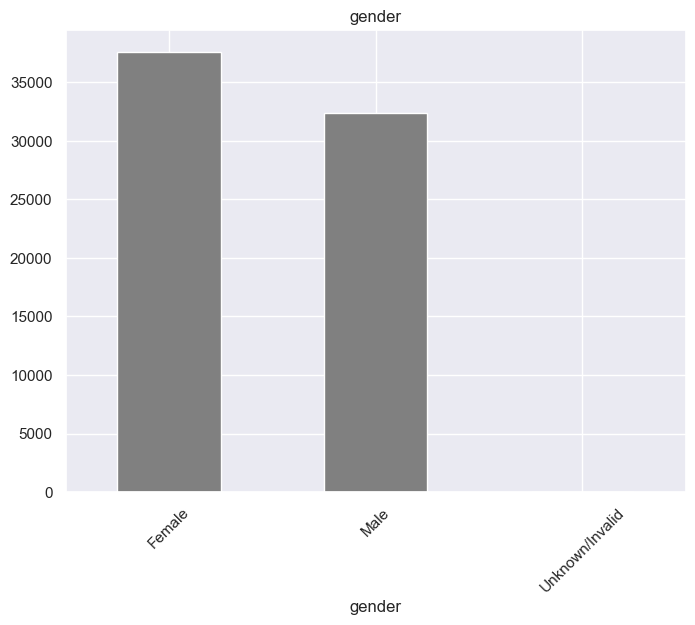

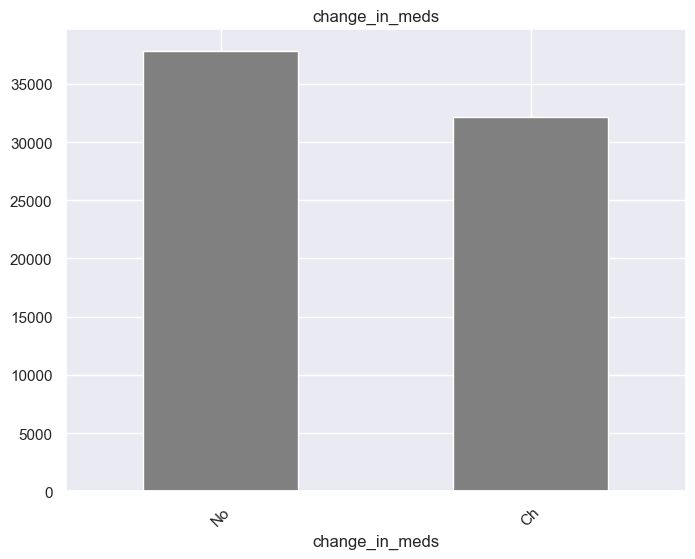

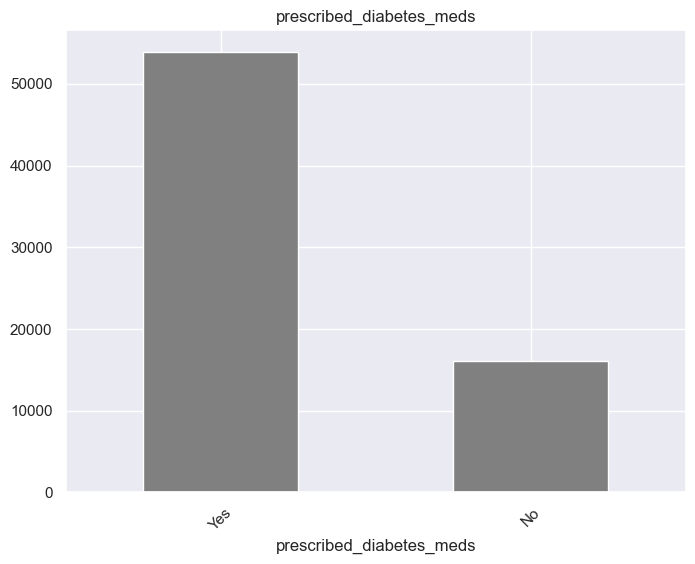

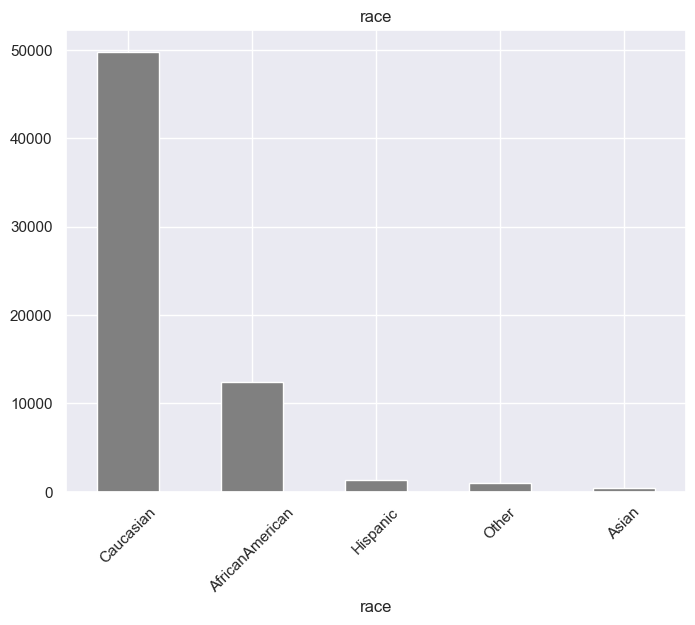

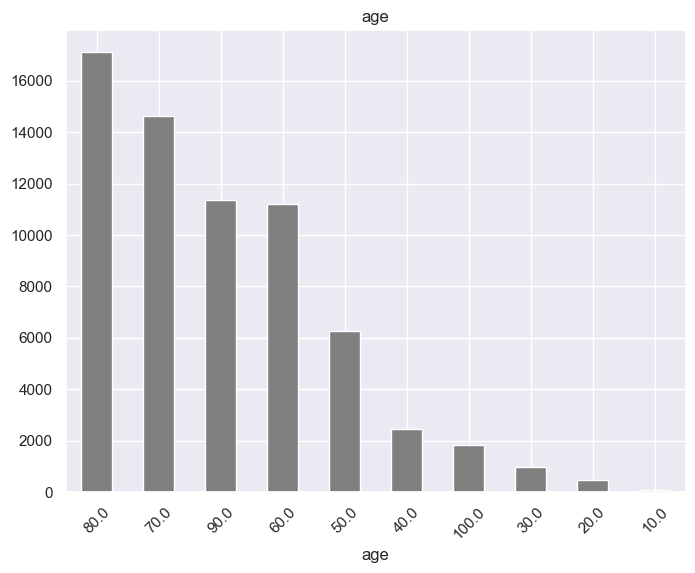

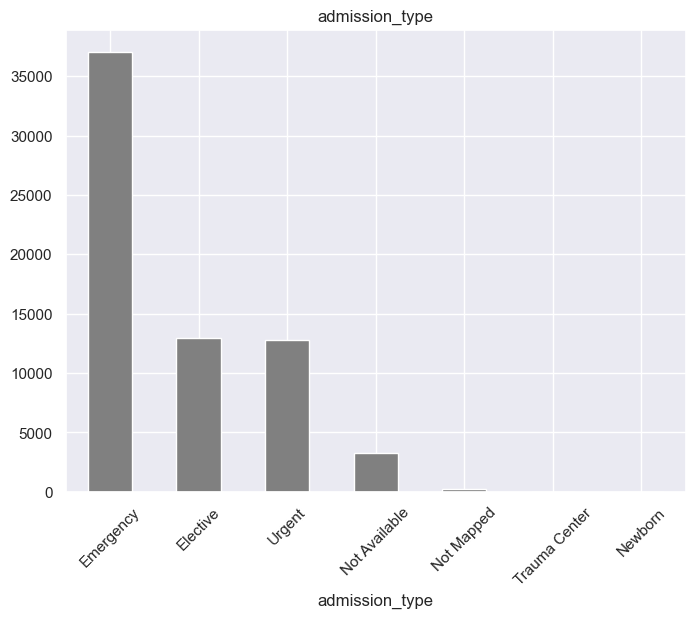

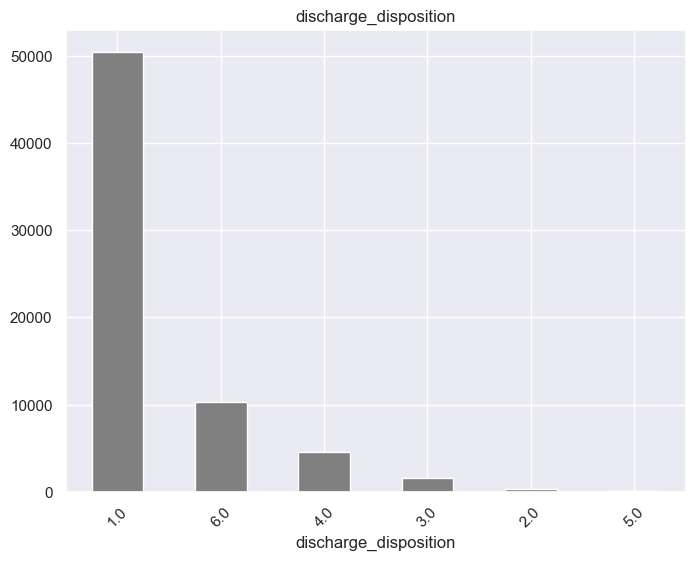

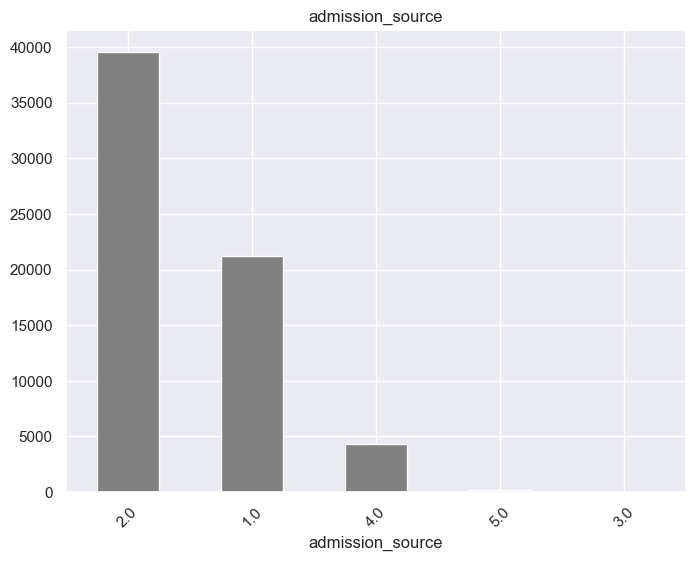

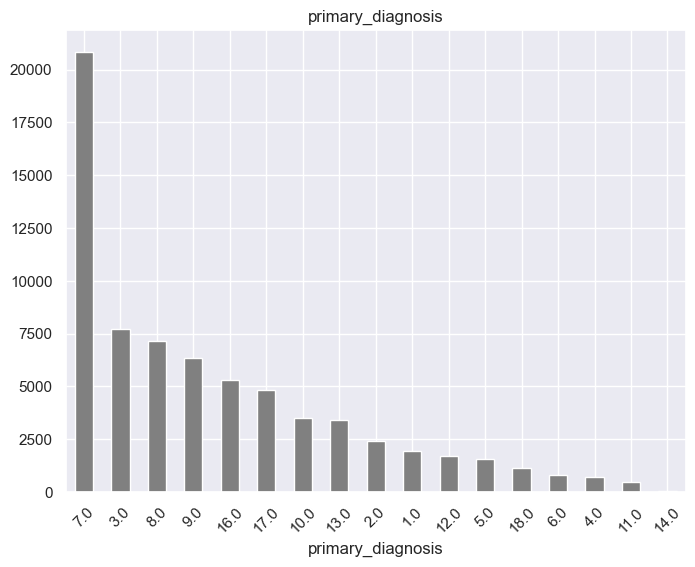

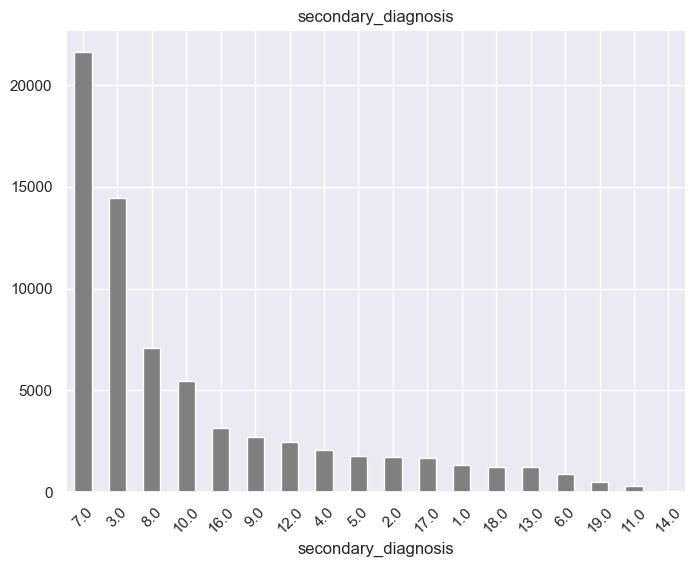

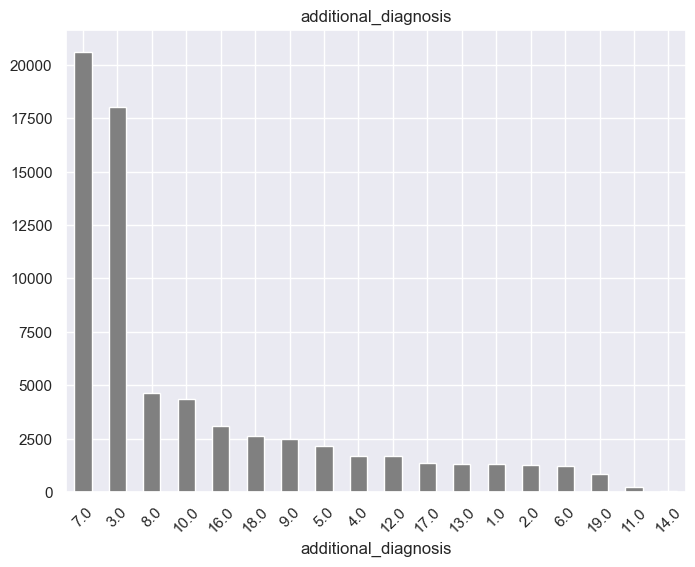

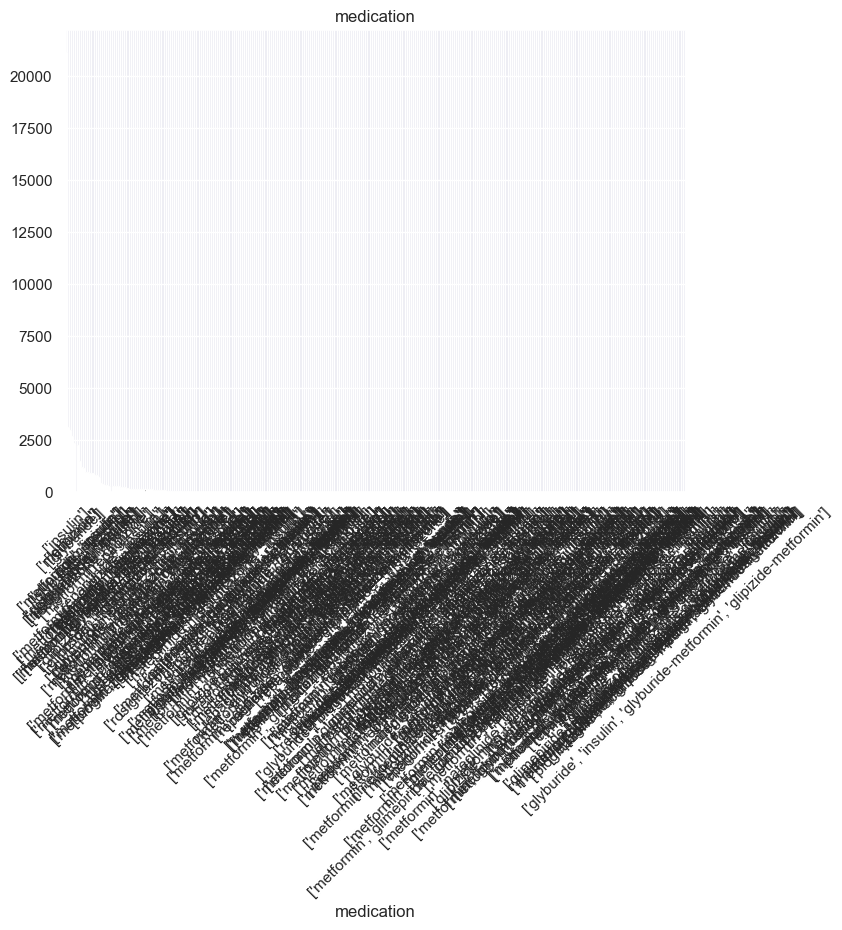

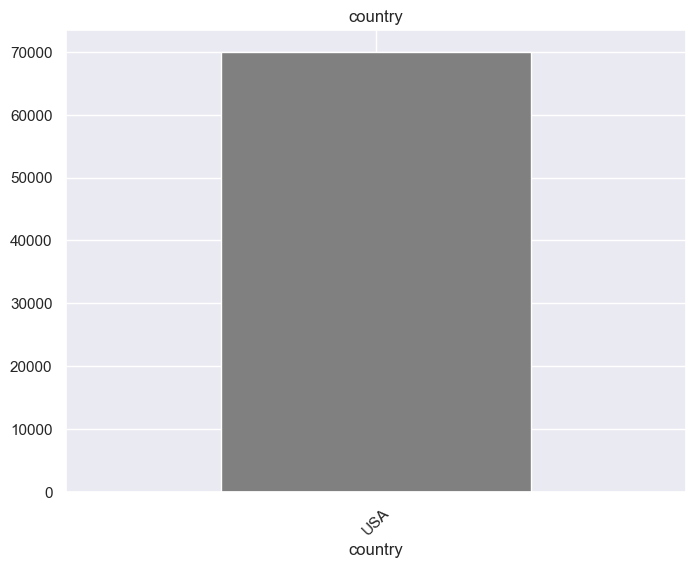

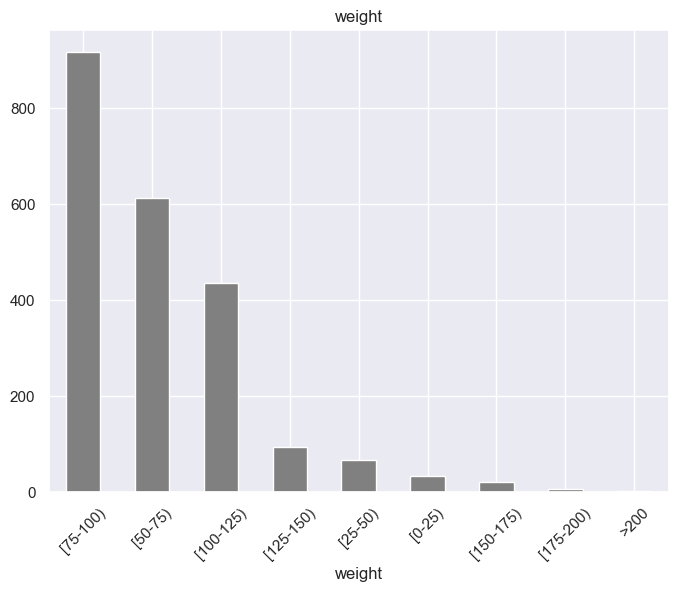

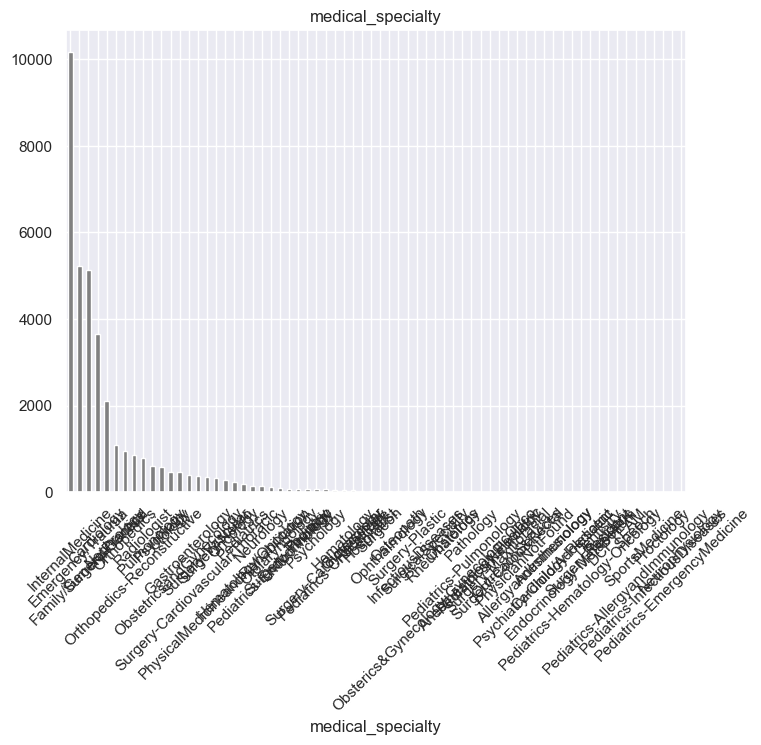

In [33]:
# Loop through each binary variable and create a separate bar plot
for feature in non_metric_feats:
    plt.figure(figsize=(8, 6))
    variable_counts = data[feature].value_counts()
    variable_counts.plot(kind='bar', color='gray')
    plt.title(feature)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

<div class="alert alert-block alert-success">
<a class="anchor" id="seven-bullet">    

## 1.5. Missing values
 </a>
    
</div>

In [34]:
data.isna().sum()

country                         0
patient_id                      0
race                         4998
gender                          0
age                          3491
weight                      67782
payer_code                  27875
outpatient_visits               0
emergency_visits                0
inpatient_visits                0
admission_type               3644
medical_specialty           34263
discharge_disposition        2589
admission_source             4663
length_of_stay                  0
number_lab_tests                0
non_lab_procedures              0
number_of_medications           0
primary_diagnosis              16
secondary_diagnosis           261
additional_diagnosis          999
number_diagnoses                0
glucose_test_result         66335
a1c_test_result             58226
change_in_meds                  0
prescribed_diabetes_meds        0
medication                  16114
readmitted_binary               0
readmitted_multiclass           0
dtype: int64

In [35]:
# % of missing values
round((data.isna().sum())/len(data)*100, 2).sort_values(ascending=False)

weight                      96.87
glucose_test_result         94.81
a1c_test_result             83.22
medical_specialty           48.97
payer_code                  39.84
medication                  23.03
race                         7.14
admission_source             6.66
admission_type               5.21
age                          4.99
discharge_disposition        3.70
additional_diagnosis         1.43
secondary_diagnosis          0.37
primary_diagnosis            0.02
number_diagnoses             0.00
country                      0.00
prescribed_diabetes_meds     0.00
readmitted_binary            0.00
change_in_meds               0.00
length_of_stay               0.00
number_of_medications        0.00
non_lab_procedures           0.00
number_lab_tests             0.00
patient_id                   0.00
inpatient_visits             0.00
emergency_visits             0.00
outpatient_visits            0.00
gender                       0.00
readmitted_multiclass        0.00
dtype: float64

### Working on the results for Missing Values

In [36]:
# Drop weight since it has too many missing values
# Country has no missing values, but they're all the same, so don't add info to the model
# medical_specialty has 50% of missing values and imputing this values would cause bias to the models
data.drop(columns=['weight', 'country','medical_specialty', 'readmitted_multiclass'], inplace=True)

#remove this from non_metric_feats
non_metric_feats.remove('weight')
non_metric_feats.remove('country')
non_metric_feats.remove('medical_specialty')

In [37]:
# Let's assume missing values on glucose_test_result and a1c_test_result to be from people that didn't do the glucose exam
data['glucose_test_result'].fillna('None', inplace= True)
data['a1c_test_result'].fillna('None', inplace= True)

# Assume missing values on payer_code to be from people that don't have insurance
data['payer_code'].fillna('None', inplace= True)

# Let's assume missing values on medication to be from people that don't take any meds
data['medication'].fillna('No_meds', inplace= True)

In [38]:
# Through the feature 'number_diagnosis', some of the missing values on secondary_diagnosis and additional_diagnosis are actually empty values
# Example: if number_diagnosis=1, the patient only has 1 primary diagnosis

data['secondary_diagnosis'] = data['secondary_diagnosis'].fillna(data['number_diagnoses'].map({1:0}))

data['additional_diagnosis'] = data['additional_diagnosis'].fillna(data['number_diagnoses'].map({1:0, 2:0}))

In [39]:
data.isna().sum()

patient_id                     0
race                        4998
gender                         0
age                         3491
payer_code                     0
outpatient_visits              0
emergency_visits               0
inpatient_visits               0
admission_type              3644
discharge_disposition       2589
admission_source            4663
length_of_stay                 0
number_lab_tests               0
non_lab_procedures             0
number_of_medications          0
primary_diagnosis             16
secondary_diagnosis          253
additional_diagnosis         990
number_diagnoses               0
glucose_test_result            0
a1c_test_result                0
change_in_meds                 0
prescribed_diabetes_meds       0
medication                     0
readmitted_binary              0
dtype: int64

### Imputation of missing values

In [40]:
data_central = data.copy()

# Assuming non_metric_feats contains the names of your non-metric features
modes = data_central[non_metric_feats].mode().loc[0]

# Concatenate the modes into a DataFrame
missing_values = pd.DataFrame(modes, columns=['Mode'])

data_central.fillna(modes, inplace=True)

# Display the DataFrame after imputation
data = data_central.copy()


In [41]:
data.isna().sum()

patient_id                  0
race                        0
gender                      0
age                         0
payer_code                  0
outpatient_visits           0
emergency_visits            0
inpatient_visits            0
admission_type              0
discharge_disposition       0
admission_source            0
length_of_stay              0
number_lab_tests            0
non_lab_procedures          0
number_of_medications       0
primary_diagnosis           0
secondary_diagnosis         0
additional_diagnosis        0
number_diagnoses            0
glucose_test_result         0
a1c_test_result             0
change_in_meds              0
prescribed_diabetes_meds    0
medication                  0
readmitted_binary           0
dtype: int64

<div class="alert alert-block alert-success">
<a class="anchor" id="eight-bullet">    

## 1.6. Feature engineering
 </a>
    
</div>

In [42]:
# Create column with recurrency of patients
data['recurrency'] = data['patient_id'].duplicated(keep=False).astype(int)

In [43]:
# Patient Severity: Sum the number of diagnoses, lab tests, and non-lab procedures to create a composite severity score for each patient.
# Create a new column for the composite severity score
data['patient_severity_score'] = data['number_diagnoses'] + data['number_lab_tests'] + data['non_lab_procedures']

In [44]:
# Define a function to calculate the ratio of changes in medication to the total number of medications
def calculate_medication_change_ratio(row):
    total_medications = row['number_of_medications']
    medication_changes = row['change_in_meds']

    # Check if there is a change in medication
    if medication_changes == 'Ch':
        return 1.0 * total_medications  # You can adjust this multiplier based on your preference
    else:
        return 0.0

# Apply the function to create the new feature
data['medication_change_ratio'] = data.apply(calculate_medication_change_ratio, axis=1)


In [45]:
#Number of Prior Visits: Count the number of visits each patient has had before the current encounter.

# Reset the index to make 'encounter_id' a regular column
data = data.reset_index()

# Create column to count the number of visits each patient had before the current encounter
data['number_prior_visits'] = data.groupby('patient_id')['encounter_id'].transform('cumcount')

In [46]:
# Create a new column for the ratio of lab tests to medications
data['lab_tests_to_medications_ratio'] = data['number_lab_tests'] / data['number_of_medications']

In [47]:
'''
Age times medications:
create a new feature representing the product of age and the number of medications,
to capture a combined effect of a patient's age and the number of medications they are taking
'''
# Create a new age-related interaction feature
data['age_times_medications'] = data['age'] * data['number_of_medications']

In [48]:
data.dtypes

encounter_id                        int64
patient_id                          int64
race                               object
gender                             object
age                               float64
payer_code                         object
outpatient_visits                 float64
emergency_visits                  float64
inpatient_visits                  float64
admission_type                     object
discharge_disposition             float64
admission_source                  float64
length_of_stay                    float64
number_lab_tests                    int64
non_lab_procedures                float64
number_of_medications             float64
primary_diagnosis                 float64
secondary_diagnosis               float64
additional_diagnosis              float64
number_diagnoses                    int64
glucose_test_result                object
a1c_test_result                    object
change_in_meds                     object
prescribed_diabetes_meds          

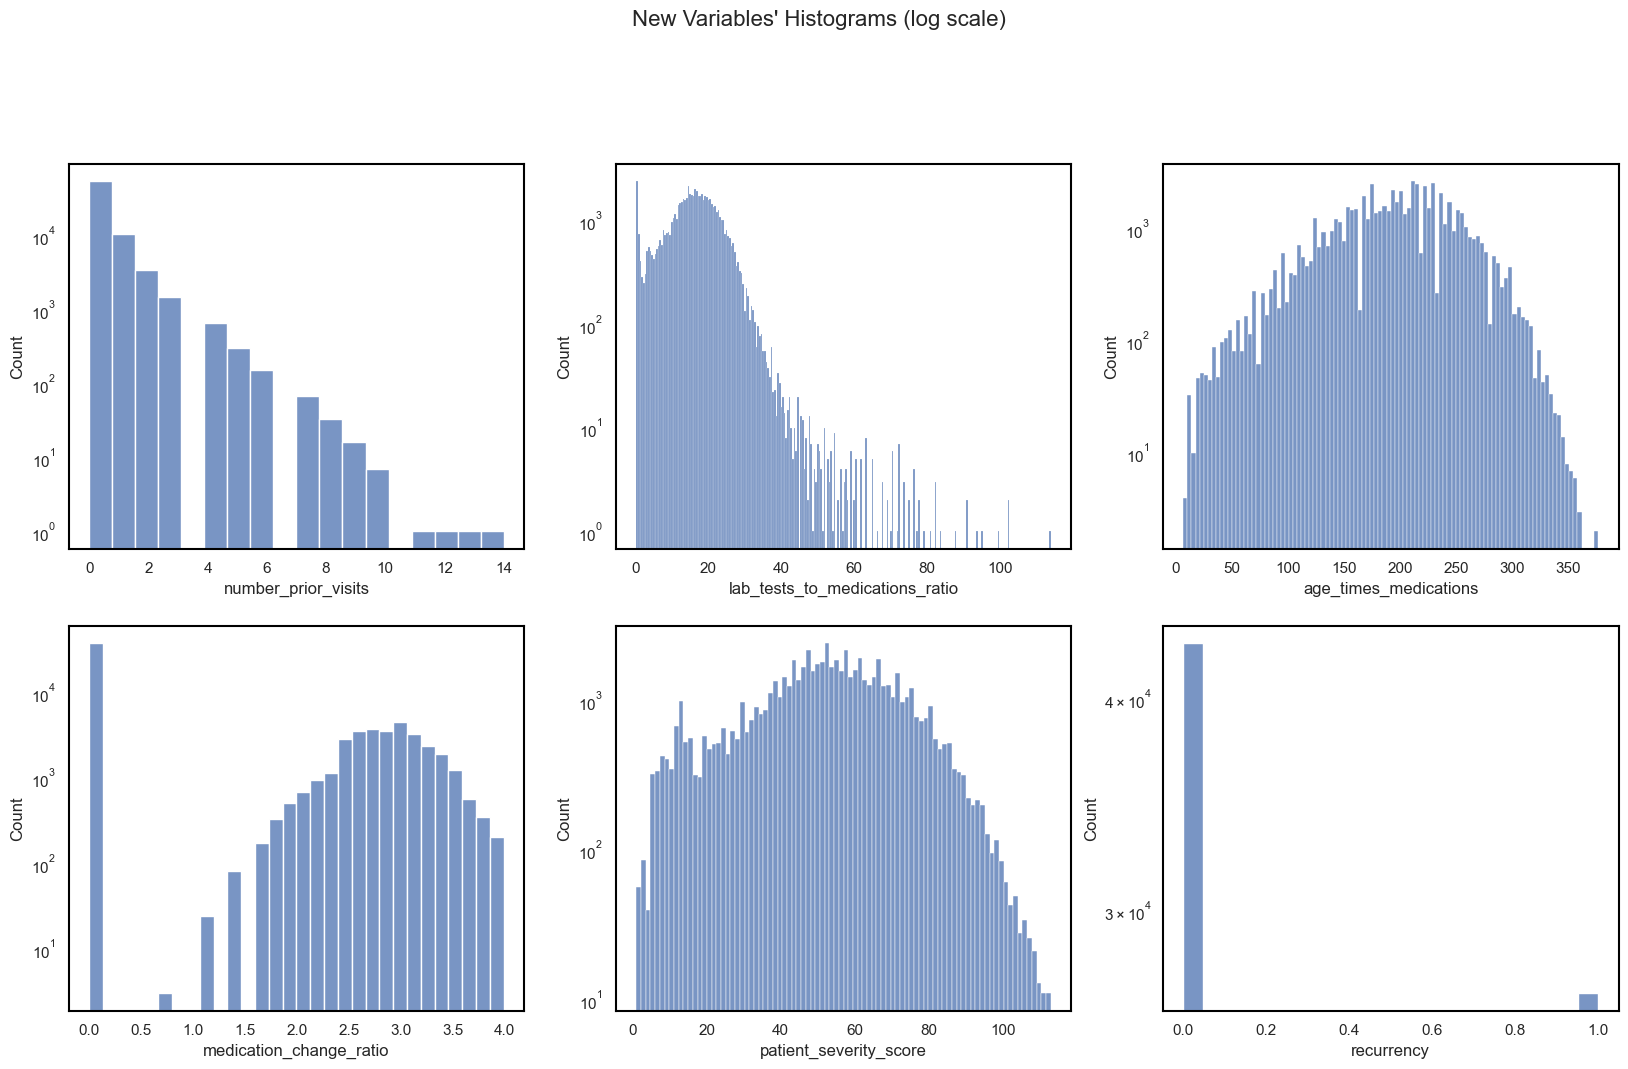

In [49]:
new_feats = ['number_prior_visits','lab_tests_to_medications_ratio', 'age_times_medications','medication_change_ratio',
'patient_severity_score','recurrency']


sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(new_feats) / 2), figsize=(20, 11))
for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor('white') # White background
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Frame color
            spine.set_linewidth(1.5) 
# Plot data
for ax, feat in zip(axes.flatten(), new_feats):
    sns.histplot(data=data, x=data[feat], ax=ax)
    ax.set_yscale("log")  # Set a logarithmic scale for the y-axis

# Layout
# Add a centered title to the figure
fig.suptitle("New Variables' Histograms (log scale)", fontsize=16, y=1.02)

plt.show()

Transformation of new variables

In [50]:
#in the variables that have the distributions right skewed 
feats_to_log_2 = ['number_prior_visits', 'lab_tests_to_medications_ratio']
# Log transformation of metric features
data[feats_to_log_2] = np.log1p(data[feats_to_log_2])

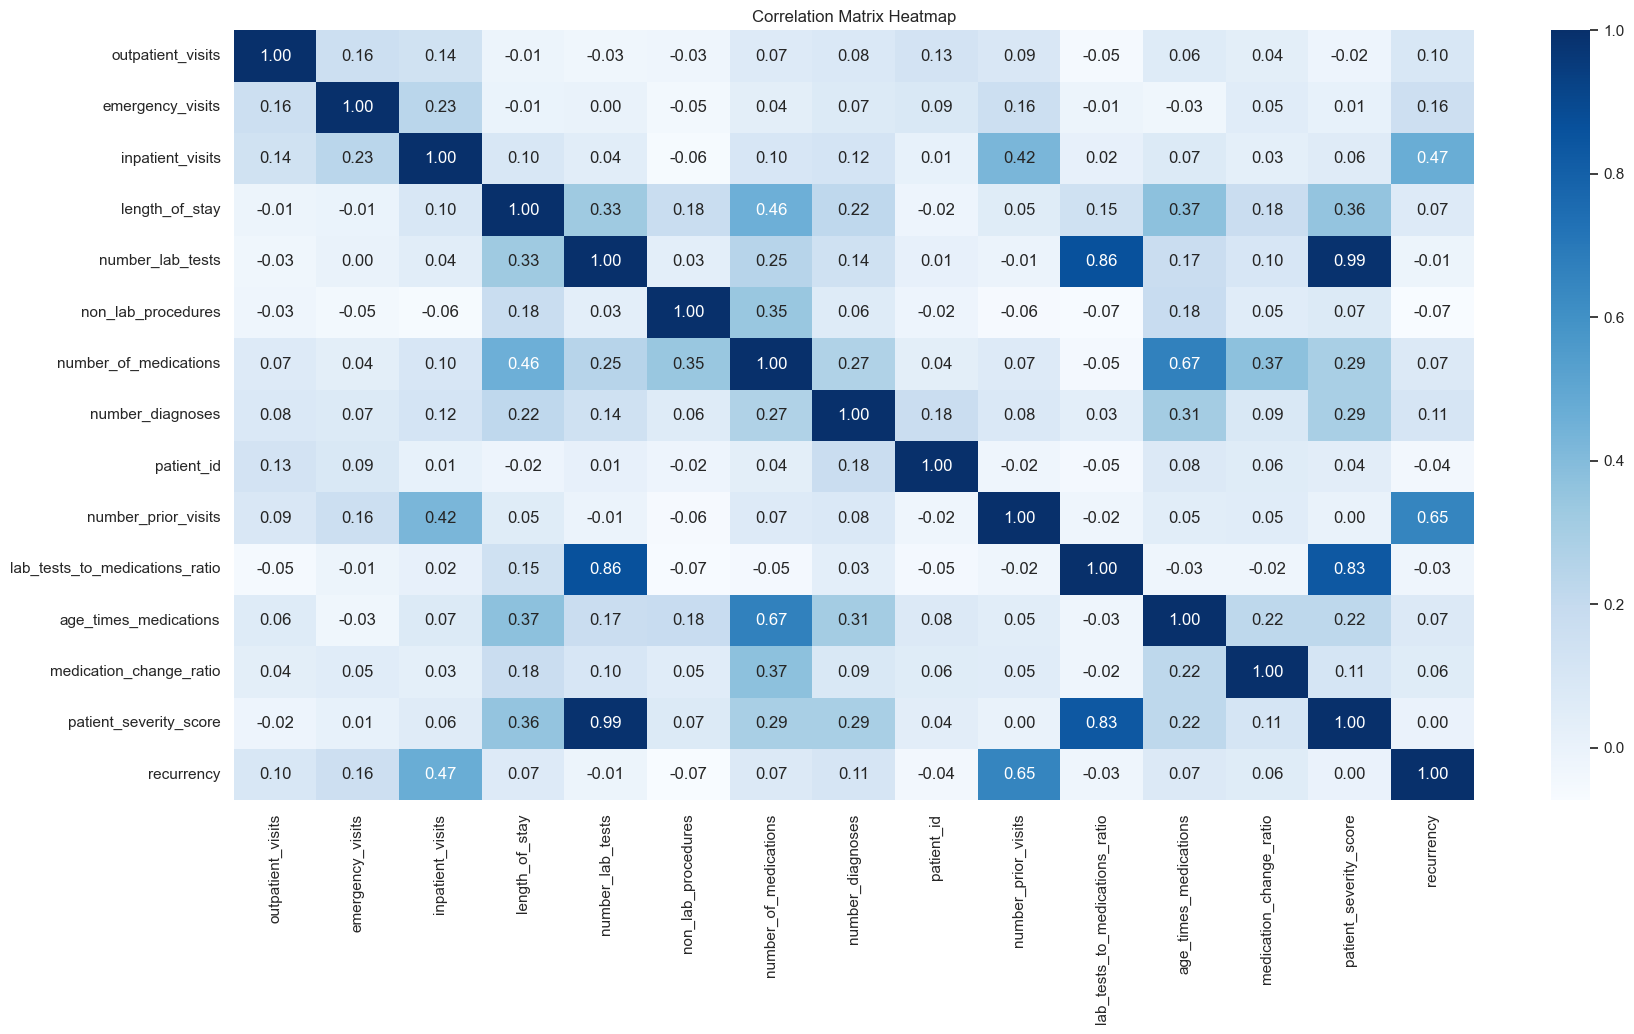

In [51]:
# Correlation Matrix
correlation_matrix = data[metric_feats+new_feats].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

### Encoding categorical variables

In [52]:
v_to_encode = ['payer_code','glucose_test_result', 'a1c_test_result', 'gender', 'change_in_meds', 'prescribed_diabetes_meds', 'race', 'admission_type', 'medication']

# label_encoder
label_encoder = LabelEncoder()

for column in v_to_encode: 
    data[column] = label_encoder.fit_transform(data[column])

In [53]:
data.set_index('encounter_id', inplace=True)

<div class="alert alert-block alert-info">
<a class="anchor" id="nine-bullet">     

# 2. Feature selection
</a>    
</div>

In [54]:
target_column = 'readmitted_binary'

X_cat = data[non_metric_feats]
y = data[target_column]

X_train_cat, X_val_cat, y_train, y_val = train_test_split(X_cat, y, test_size=0.2, random_state=42)

def TestIndependence(X, y, var, alpha=0.05):        
    dfObserved = pd.crosstab(y, X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index=dfObserved.index)
    
    if p < alpha:
        result = f"{var} is IMPORTANT for Prediction"
    else:
        result = f"{var} is NOT an important predictor. (Discard {var} from model)"
    
    print(result)

for var in X_train_cat.columns:
    TestIndependence(X_train_cat[var], y_train, var)

payer_code is IMPORTANT for Prediction
glucose_test_result is NOT an important predictor. (Discard glucose_test_result from model)
a1c_test_result is IMPORTANT for Prediction
gender is NOT an important predictor. (Discard gender from model)
change_in_meds is IMPORTANT for Prediction
prescribed_diabetes_meds is IMPORTANT for Prediction
race is NOT an important predictor. (Discard race from model)
age is IMPORTANT for Prediction
admission_type is IMPORTANT for Prediction
discharge_disposition is IMPORTANT for Prediction


admission_source is IMPORTANT for Prediction
primary_diagnosis is IMPORTANT for Prediction
secondary_diagnosis is IMPORTANT for Prediction
additional_diagnosis is IMPORTANT for Prediction
medication is IMPORTANT for Prediction


## Scaler

In [55]:
# preserve dataframe without scale
df = data.copy()

In [65]:
# with the log trnasformations we have normal distributions we can use standard scaler since we don´t have skewed distributions
feats_to_scale = data.columns.drop('readmitted_binary').to_list()
scaler = RobustScaler()
data[feats_to_scale] =  scaler.fit_transform(data[feats_to_scale])

In [66]:
feats_to_test = ['race', 'gender', 'age', 'payer_code',
       'outpatient_visits', 'emergency_visits', 'inpatient_visits',
       'admission_type', 'discharge_disposition', 'admission_source',
       'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'primary_diagnosis', 'secondary_diagnosis',
       'additional_diagnosis', 'number_diagnoses', 'glucose_test_result',
       'a1c_test_result', 'change_in_meds', 'prescribed_diabetes_meds',
       'medication', 'recurrency', 'patient_severity_score',
       'medication_change_ratio', 'number_prior_visits',
       'lab_tests_to_medications_ratio', 'age_times_medications']

In [67]:
X = data[feats_to_test]  # Features
y = data['readmitted_binary']  # Target variable

<div class="alert alert-block alert-success">
<a class="anchor" id="ten-bullet">    

## 2.1. Mutual information
 </a>
    
</div>

In [68]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Calculate mutual information scores for each feature
mi_scores = mutual_info_classif(X_train, y_train)

# Create a list of tuples containing feature names and their scores
feature_scores = list(zip(X_train.columns, mi_scores))

# Print the feature importance scores in descending order
print("Mutual Information Scores (Descending Order):")
for feature, score in sorted(feature_scores, key=lambda x: x[1], reverse=True):
    print(f"{feature}: {score}")

# Use cross-validation to get a more robust estimate of the model's performance
classifier = RandomForestClassifier()  # Replace with your desired classifier
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')  # Adjust cv and scoring as needed

print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean CV Score: {cv_scores.mean()}")

Mutual Information Scores (Descending Order):
recurrency: 0.029254803696364018
number_prior_visits: 0.014931387295660237
inpatient_visits: 0.010382431869486286
discharge_disposition: 0.0071818166706301145
gender: 0.006297353499874925
non_lab_procedures: 0.004406965167512489
change_in_meds: 0.004112807215613801
medication: 0.003319522566824107
lab_tests_to_medications_ratio: 0.0030354227298601266
age_times_medications: 0.0026644626185656772
admission_source: 0.0026406499416335993
length_of_stay: 0.0021057353402094137
payer_code: 0.0020681881481805497
additional_diagnosis: 0.0019531236386649553
age: 0.0017171763615575486
a1c_test_result: 0.0017143302439652786
emergency_visits: 0.001667360595070777
admission_type: 0.0015103480500371358
number_diagnoses: 0.0010583977751676965
number_of_medications: 0.0008644634385763794
prescribed_diabetes_meds: 0.0008001154744237127
patient_severity_score: 0.00076421485162248
medication_change_ratio: 0.0007621603667169463
primary_diagnosis: 0.000639632215

<div class="alert alert-block alert-success">
<a class="anchor" id="eleven-bullet">    

## 2.2. Boruta
 </a>
    
</div>

In [72]:
X = X.values
y = y.values

# Initialize a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Perform cross-validation to get a more robust estimate of the model's performance
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')  # Adjust cv and scoring as needed

print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean CV Score: {cv_scores.mean()}")

# Initialize Boruta
boruta_selector = BorutaPy(rf_classifier, n_estimators='auto', verbose=2, random_state=42)

# Fit Boruta on the data
boruta_selector.fit(X, y)

# Zip names, ranks, and decisions into a single iterable
feature_ranks = list(zip(feats_to_test,
                         boruta_selector.ranking_,
                         boruta_selector.support_))

# Sort by ranking
feature_ranks_sorted = sorted(feature_ranks, key=lambda x: x[1])

# Iterate through and print out the results
for feat in feature_ranks_sorted:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))


Cross-Validation Scores:
[0.89073889 0.89102472 0.89081035 0.89116764 0.89094547]
Mean CV Score: 0.8909374152561489
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	27
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	27
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	27
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	27
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	27
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	27
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	27
Iteration:

In [73]:
X = data[feats_to_test]  # Features
y = data['readmitted_binary']  # Target variable

<div class="alert alert-block alert-success">
<a class="anchor" id="twelve-bullet">    

## 2.3. Ridge Regression
 </a>
    
</div>

In [74]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert target values to numeric
y_train = y_train.replace({'Yes': 1, 'No': 0})
y_val = y_val.replace({'Yes': 1, 'No': 0})

alpha_values = [0.1, 1, 10, 100]
parameters = {'alpha': alpha_values}

ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, parameters, cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
final_ridge_model = Ridge(alpha=best_alpha)
final_ridge_model.fit(X_train, y_train)

coefficients = final_ridge_model.coef_

y_pred = final_ridge_model.predict(X_val)

coefficients

# zip my names, ranks, and decisions in a single iterable
feature_ranks = list(zip(feats_to_test, coefficients))

# Sort the feature ranks by coefficients in descending order
sorted_feature_ranks = sorted(feature_ranks, key=lambda x: abs(x[1]), reverse=True)

# iterate through and print out the results
for feat in feature_ranks:
    print('Feature: {:<25} Coef: {}'.format(feat[0], feat[1]))

# Perform cross-validation to get a more robust estimate of the model's performance
cv_scores = cross_val_score(final_ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')  # Adjust cv and scoring as needed

print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean CV Score: {cv_scores.mean()}")

Feature: race                      Coef: 0.0025986893176291916
Feature: gender                    Coef: 0.0021303422979749003
Feature: age                       Coef: -0.00047114433060605246
Feature: payer_code                Coef: 0.0032425611764358886
Feature: outpatient_visits         Coef: 0.000998844140094427
Feature: emergency_visits          Coef: 0.014680483045122636
Feature: inpatient_visits          Coef: 0.011955478997817324
Feature: admission_type            Coef: -5.519397833644154e-05
Feature: discharge_disposition     Coef: 0.008845728865678287
Feature: admission_source          Coef: -0.0002183560380619574
Feature: length_of_stay            Coef: 0.003294236661840689
Feature: number_lab_tests          Coef: 0.0005451476285688777
Feature: non_lab_procedures        Coef: 0.0027092185818429026
Feature: number_of_medications     Coef: 0.0022584889415671826
Feature: primary_diagnosis         Coef: -0.0013508473095304215
Feature: secondary_diagnosis       Coef: -0.00061161381

<div class="alert alert-block alert-success">
<a class="anchor" id="13-bullet">    

## 2.4. RFE
 </a>
    
</div>

In [75]:
# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Initialize RFE with the Random Forest model and the number of features to select
rfe = RFE(estimator=rf_classifier)

# Perform cross-validation to get a more robust estimate of the model's performance
cv_scores = cross_val_score(rfe, X, y, cv=5, scoring='accuracy') 

print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean CV Score: {cv_scores.mean()}")

# Fit RFE to the data
rfe.fit(X, y)

# Create a DataFrame with features, ranking, and support
feature_ranks_df = pd.DataFrame({'Feature': feats_to_test,
                                  'Ranking': rfe.ranking_,
                                  'Support': rfe.support_})

# Sort the DataFrame by ranking
sorted_feature_ranks_df = feature_ranks_df.sort_values(by='Ranking')

# Print the selected features and their ranking
print("\nSelected Features with Ranking:")
print(sorted_feature_ranks_df[['Feature', 'Ranking']])


Cross-Validation Scores:
[0.89095327 0.89088181 0.89109618 0.89045305 0.89044522]
Mean CV Score: 0.8907659060343377

Selected Features with Ranking:
                           Feature  Ranking
14               primary_diagnosis        1
26             number_prior_visits        1
25         medication_change_ratio        1
24          patient_severity_score        1
23                      recurrency        1
22                      medication        1
16            additional_diagnosis        1
15             secondary_diagnosis        1
27  lab_tests_to_medications_ratio        1
13           number_of_medications        1
11                number_lab_tests        1
28           age_times_medications        1
6                 inpatient_visits        1
10                  length_of_stay        1
3                       payer_code        2
12              non_lab_procedures        3
17                number_diagnoses        4
2                              age        5
8            d

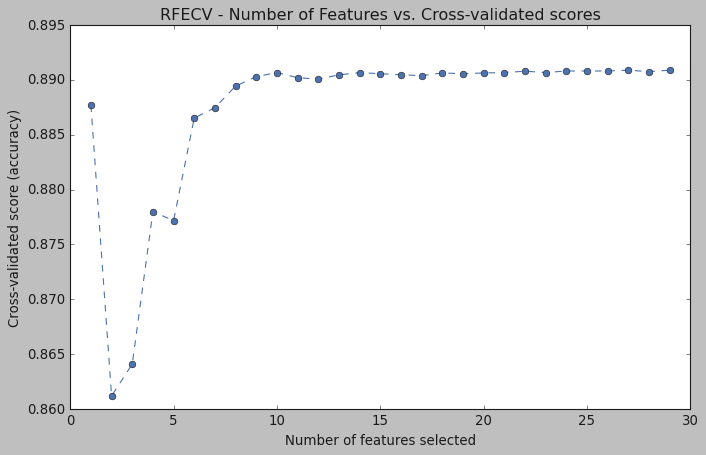

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Initialize RFECV
rfecv = RFECV(estimator=model, step=1, cv=5)

# Fit RFECV
rfecv.fit(X_train, y_train)

# Plot number of features vs. cross-validated scores
plt.style.use('classic')
plt.figure(figsize=(10, 6), facecolor='white')
plt.title('RFECV - Number of Features vs. Cross-validated scores')
plt.xlabel('Number of features selected')
plt.ylabel('Cross-validated score (accuracy)')
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"], marker='o', linestyle='--', color='b')
plt.grid(True)
# Set the frame color to black
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
plt.show()

Optimum number of features: 14
Score with 14 features: 0.890810


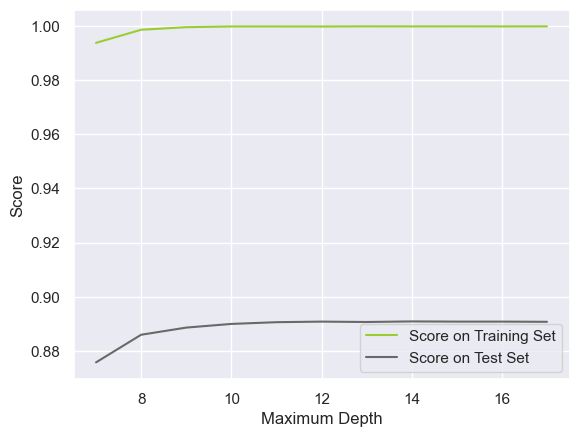

In [101]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#no of features
nof_list=np.arange(7,18)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = RandomForestClassifier(class_weight='balanced', random_state=42)
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_val_rfe = rfe.transform(X_val)
    
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

plt.plot(list(range(7,18)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(7,18)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
<a class="anchor" id="14-bullet">    

## 2.5. Select K Best
 </a>
    
</div>

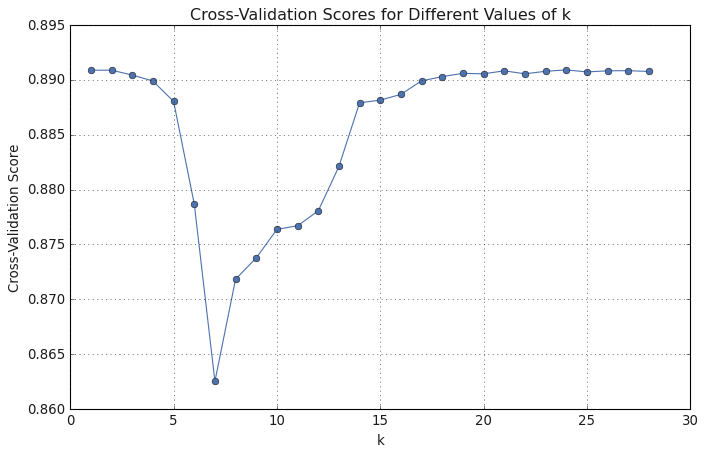

Best k: 24
Best Score: 0.8909088295347167
Selected Features: Index(['gender', 'age', 'payer_code', 'outpatient_visits', 'emergency_visits',
       'inpatient_visits', 'discharge_disposition', 'length_of_stay',
       'number_lab_tests', 'non_lab_procedures', 'number_of_medications',
       'primary_diagnosis', 'additional_diagnosis', 'number_diagnoses',
       'a1c_test_result', 'change_in_meds', 'prescribed_diabetes_meds',
       'medication', 'recurrency', 'patient_severity_score',
       'medication_change_ratio', 'number_prior_visits',
       'lab_tests_to_medications_ratio', 'age_times_medications'],
      dtype='object')
Cross-Validation Scores: [0.89081035 0.89102472 0.89116764 0.89073889 0.89080254]
Mean Accuracy: 0.8909088295347167


In [103]:
# Create a pipeline with SelectKBest and a classifier
def create_pipeline(k):
    if k == 'all':
        return make_pipeline(SelectKBest(f_classif, k=k), RandomForestClassifier(random_state=42))
    else:
        return make_pipeline(SelectKBest(f_classif, k=min(k, X.shape[1])), RandomForestClassifier(random_state=42))

# Choose a range of k values to try
k_values = [i for i in range(1, min(X.shape[1], 29))]  # Adjusted the range

# Perform cross-validation for each k
cv_scores = []
for k in k_values:
    pipeline = create_pipeline(k)
    scores = cross_val_score(pipeline, X, y, cv=5)  # 5-fold cross-validation
    cv_scores.append(np.mean(scores))

# Plot the scores for different k values
plt.style.use('classic')
fig = plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(k_values, cv_scores, marker='o')
plt.title('Cross-Validation Scores for Different Values of k')
plt.xlabel('k')
plt.ylabel('Cross-Validation Score')
plt.grid(True)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
plt.show()

# Find the k that results in the highest cross-validation score
best_k = k_values[np.argmax(cv_scores)]
best_score = np.max(cv_scores)
print("Best k:", best_k)
print("Best Score:", best_score)

# Create the final pipeline with the best k
final_pipeline = create_pipeline(best_k)

# Fit the final pipeline on the entire dataset
final_pipeline.fit(X, y)

# Get the selected features
k_best = final_pipeline.named_steps['selectkbest']
selected_features = X.columns[k_best.get_support()]

# Display the selected features
print("Selected Features:", selected_features)

# Use a classifier (e.g., RandomForest) with the selected features

# Define the classifier
clf = final_pipeline.named_steps['randomforestclassifier']

# Perform cross-validation on the entire dataset
cv_scores = cross_val_score(final_pipeline, X, y, cv=5)  # You can adjust the number of folds (cv parameter) as needed
cv_scores_binary = cv_scores
# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

In [104]:
# k = 14
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Select the top k features using SelectKBest
k_best = SelectKBest(f_classif, k=14)  # Adjust k based on your needs

X_train_kbest = k_best.fit_transform(X_train, y_train)
X_val_kbest = k_best.transform(X_val)

# Get the selected features
selected_features = X.columns[k_best.get_support()]

# Display the selected features
print("Selected Features:", selected_features)

# Use a classifier (e.g., RandomForest) with the selected features

# Define the classifier
clf = RandomForestClassifier(random_state=42)

# Combine feature selection and classification into a pipeline
pipeline = Pipeline([('feature_selection', k_best), ('classification', clf)])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5)  # You can adjust the number of folds (cv parameter) as needed

# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Selected Features: Index(['age', 'outpatient_visits', 'emergency_visits', 'inpatient_visits',
       'discharge_disposition', 'length_of_stay', 'number_of_medications',
       'number_diagnoses', 'prescribed_diabetes_meds', 'recurrency',
       'patient_severity_score', 'medication_change_ratio',
       'number_prior_visits', 'age_times_medications'],
      dtype='object')
Cross-Validation Scores: [0.88838073 0.8877376  0.88866657 0.88752322 0.88722933]
Mean Accuracy: 0.887907492201357


<div class="alert alert-block alert-success">
<a class="anchor" id="15-bullet">    

## 2.6. Random Forest 
 </a>
    
</div>

                           Feature  Importance
23                      recurrency    0.176690
26             number_prior_visits    0.081239
27  lab_tests_to_medications_ratio    0.065419
6                 inpatient_visits    0.063823
28           age_times_medications    0.060775
24          patient_severity_score    0.060601
11                number_lab_tests    0.048768
13           number_of_medications    0.043447
8            discharge_disposition    0.041843
22                      medication    0.036165
14               primary_diagnosis    0.034117
10                  length_of_stay    0.033613
16            additional_diagnosis    0.030907
15             secondary_diagnosis    0.030188
25         medication_change_ratio    0.027370
3                       payer_code    0.025702
17                number_diagnoses    0.023228
12              non_lab_procedures    0.021591
2                              age    0.021569
7                   admission_type    0.013177
1            

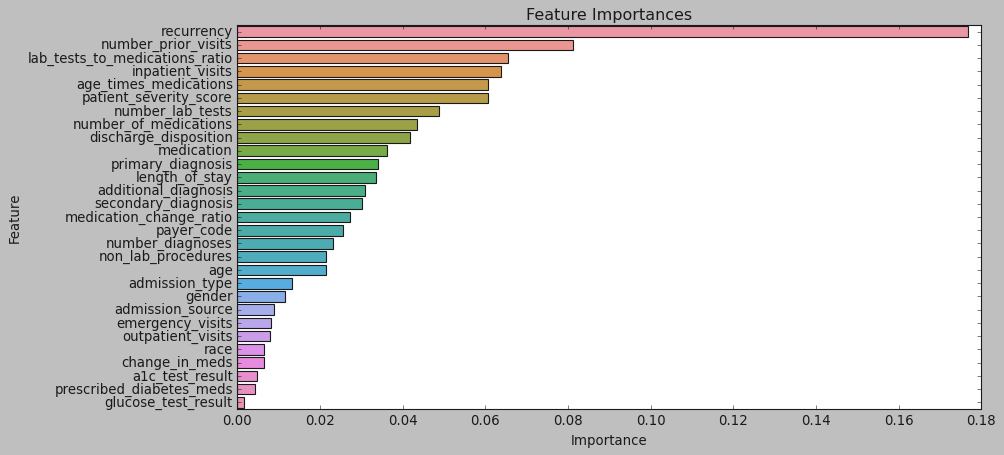

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)


clf = RandomForestClassifier(n_estimators= 200, criterion= 'entropy', max_depth=100, min_samples_leaf = 20, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
feature_importances_rf = clf.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_rf})

# Sort the DataFrame by importance in descending order
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_rf)

# Plotting the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf)
plt.title('Feature Importances')
plt.show()


<div class="alert alert-block alert-success">
<a class="anchor" id="16-bullet">    

## 2.7. LASSO Regression
 </a>
    
</div>

Cross-Validation Scores: [-0.09264611 -0.0870839  -0.09218783 -0.09536873 -0.09071753 -0.09013288
 -0.09819767 -0.08904018 -0.09409699 -0.08608372]
Mean Negative MSE: -0.09155555500477279
Lasso picked 21 variables and eliminated the other 8 variables
secondary_diagnosis              -0.002856
primary_diagnosis                -0.001199
age                               0.000000
medication_change_ratio          -0.000000
outpatient_visits                 0.000000
number_diagnoses                  0.000000
admission_source                  0.000000
number_lab_tests                  0.000000
additional_diagnosis             -0.000000
lab_tests_to_medications_ratio   -0.000000
medication                        0.000286
admission_type                    0.000307
glucose_test_result               0.000741
number_of_medications             0.001229
gender                            0.002496
length_of_stay                    0.002525
race                              0.002924
non_lab_procedures

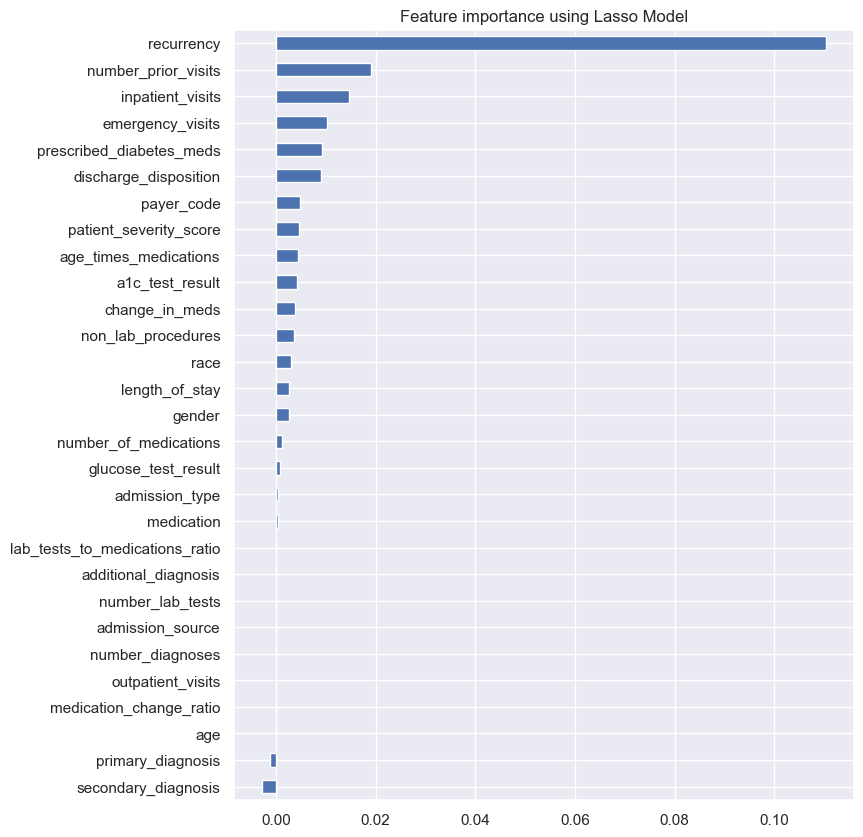

Top features and their coefficients:
recurrency                        0.110286
number_prior_visits               0.018967
inpatient_visits                  0.014674
emergency_visits                  0.010197
prescribed_diabetes_meds          0.009297
discharge_disposition             0.008950
payer_code                        0.004884
patient_severity_score            0.004628
age_times_medications             0.004477
a1c_test_result                   0.004173
change_in_meds                    0.003766
non_lab_procedures                0.003536
race                              0.002924
secondary_diagnosis               0.002856
length_of_stay                    0.002525
gender                            0.002496
number_of_medications             0.001229
primary_diagnosis                 0.001199
glucose_test_result               0.000741
admission_type                    0.000307
medication                        0.000286
additional_diagnosis              0.000000
number_diagnoses 

In [307]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y, shuffle=True)

# Convert target values to numeric
y_train = y_train.replace({'Yes': 1, 'No': 0})
y_val = y_val.replace({'Yes': 1, 'No': 0})

# Fitting LassoCV model
reg = LassoCV()

# Perform cross-validation
cv_scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')  
# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Negative MSE:", cv_scores.mean())

# Fit the LassoCV model on the entire training set
reg.fit(X_train, y_train)

# Extracting feature importances
coef = pd.Series(reg.coef_, index=X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " + str(sum(coef == 0)) + " variables")
print(coef.sort_values())

# Plot
def plot_importance(coef, name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8, 10))
    imp_coef.plot(kind="barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

plot_importance(coef, 'Lasso')


##### <hr>

### Numerical Data

| Predictor |  Mutual information | Boruta | Ridge regression | RFE CV | SelectKBest CV | Random Forest Importance | Chi-Square | LASSO | What to do? |
| --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- |
| race | Keep | Discard | Discard | Discard | Discard | Discard | Discard | Keep? | Discard |
| gender | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Keep? | Discard |
| age | Discard | Discard | Discard | Discard | Keep | Discard | Keep | Discard | Discard |
| payer_code | Discard | Discard | Discard | Discard | Discard | Keep | Keep | Keep | Discard |
| outpatient_visits |  Discard | Discard | Discard | Discard | Keep | Discard | -- | Discard | Discard |
| emergency_visits |  Keep | Discard | Keep | Discard | Keep | Discard | -- | Keep | Keep |
| inpatient_visits | Discard | Keep | Keep | Keep | Keep | Keep | -- | Keep | Keep | Keep |
| admission_type | Keep | Discard | Discard | Discard | Discard | Discard | Keep | Discard | Discard |
| discharge_disposition | Discard | Keep | Keep | Discard | Keep | Keep | Keep | Keep | Keep |
| admission_source | Discard | Discard | Discard | Discard | Discard | Discard | Keep | Discard | Discard |
| length_of_stay | Discard | Keep | Discard | Keep | Keep | Keep | -- | Keep? | Keep |
| number_lab_tests | Keep | Keep | Keep | Keep | Discard | Keep | -- | Discard | Keep |
| non_lab_procedures | Discard | Discard | Discard | Discard | Discard | Discard | -- | Keep | Discard |
| number_of_medications | Discard | Keep | Discard | Keep | Keep | Keep | -- | Discard | Keep? |
| primary_diagnosis | Discard | Keep | Discard | Keep | Discard | Keep | Keep | Discard | Discard |
| secondary_diagnosis | Discard | Keep | Discard | Keep | Discard | Keep | Keep | Discard | Discard |
| additional_diagnosis | Discard | Keep | Discard | Keep | Discard | Keep | Keep | Discard | Discard |
| number_diagnoses | Discard | Discard | Discard | Discard | Keep | Keep | -- | Discard | Discard |
| glucose_test_result | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard |
| a1c_test_result | Keep | Discard | Discard | Discard | Discard | Discard | Keep | Keep? | Discard |
| change_in_meds | Discard | Discard | Discard | Discard | Discard | Discard | Keep | Keep? | Discard |
| prescribed_diabetes_meds | Discard | Discard | Keep | Discard | Keep | Discard | Keep | Keep | Keep? |
| medication | Keep | Keep | Discard | Keep | Discard | Keep | Keep | Discard | Keep? |
| recurrency | Discard | Keep | Keep | Keep | Keep | Keep | -- | Keep | Keep | Keep | 
| patient_severity_score | Keep | Keep | Keep | Keep | Keep | Keep | -- | Keep | Keep |
| medication_change_ratio | Discard | Discard | Discard | Keep | Keep | Keep | -- | Discard | Keep? |
| number_prior_visits | Discard | Keep | Keep | Keep | Keep | Keep | -- | Keep | Keep |
| lab_tests_to_medications_ratio | Discard | Keep | Keep | Keep | Discard | Keep | -- | Discard | Keep? |
| age_times_medications | Discard | Keep | Discard | Keep | Keep | Keep | -- | Keep | Keep |


<hr>



In [60]:
# Keep the best 14 of each algorithm 

set_mutual = ['length_of_stay', 'additional_diagnosis', 'lab_tests_to_medications_ratio', 'non_lab_procedures',
               'age', 'medication', 'number_diagnoses', 'secondary_diagnosis', 'discharge_disposition', 'change_in_meds', 
               'gender', 'inpatient_visits', 'number_prior_visits', 'recurrency']

set_boruta = ['inpatient_visits', 'discharge_disposition', 'length_of_stay', 'number_lab_tests', 'number_of_medications', 'primary_diagnosis', 'secondary_diagnosis', 
 'additional_diagnosis', 'medication', 'recurrency', 'patient_severity_score', 'number_prior_visits', 'lab_tests_to_medications_ratio', 'age_times_medications']

set_ridge = ['number_prior_visits', 'recurrency', 'emergency_visits', 'inpatient_visits', 'number_lab_tests', 'patient_severity_score', 'prescribed_diabetes_meds',
 'a1c_test_result', 'discharge_disposition', 'change_in_meds', 'payer_code', 'length_of_stay', 'age_times_medications', 'non_lab_procedures']

set_rfe = ['inpatient_visits', 'length_of_stay', 'number_lab_tests', 'number_of_medications', 'primary_diagnosis', 
            'secondary_diagnosis', 'additional_diagnosis', 'medication', 'recurrency', 'patient_severity_score', 
            'medication_change_ratio', 'number_prior_visits', 'lab_tests_to_medications_ratio', 'age_times_medications']

set_selectk = ['age', 'outpatient_visits', 'emergency_visits', 'inpatient_visits', 'discharge_disposition', 
                'length_of_stay', 'number_of_medications', 'number_diagnoses', 'prescribed_diabetes_meds', 'recurrency', 
                'patient_severity_score', 'medication_change_ratio', 'number_prior_visits', 'age_times_medications']

set_tree = ['recurrency', 'number_prior_visits','lab_tests_to_medications_ratio', 'inpatient_visits', 'age_times_medications',
            'patient_severity_score', 'number_lab_tests', 'number_of_medications', 'discharge_disposition', 'medication', 
            'primary_diagnosis', 'length_of_stay', 'additional_diagnosis', 'secondary_diagnosis']


set_total = set_mutual + set_boruta + set_ridge + set_rfe + set_selectk + set_tree

from collections import Counter

x = Counter(set_total)
x.most_common()

[('length_of_stay', 6),
 ('inpatient_visits', 6),
 ('number_prior_visits', 6),
 ('recurrency', 6),
 ('discharge_disposition', 5),
 ('patient_severity_score', 5),
 ('age_times_medications', 5),
 ('additional_diagnosis', 4),
 ('lab_tests_to_medications_ratio', 4),
 ('medication', 4),
 ('secondary_diagnosis', 4),
 ('number_lab_tests', 4),
 ('number_of_medications', 4),
 ('primary_diagnosis', 3),
 ('non_lab_procedures', 2),
 ('age', 2),
 ('number_diagnoses', 2),
 ('change_in_meds', 2),
 ('emergency_visits', 2),
 ('prescribed_diabetes_meds', 2),
 ('medication_change_ratio', 2),
 ('gender', 1),
 ('a1c_test_result', 1),
 ('payer_code', 1),
 ('outpatient_visits', 1)]

In [71]:
selected_features_6_5_times = []
selected_features_6_5_4_times = []

for feature, count in x.items():
    if count >= 5:
        selected_features_6_5_times.append(feature)
    if count >= 4:
        selected_features_6_5_4_times.append(feature)

print(selected_features_6_5_times)
print(selected_features_6_5_4_times)

['length_of_stay', 'discharge_disposition', 'inpatient_visits', 'number_prior_visits', 'recurrency', 'patient_severity_score', 'age_times_medications']
['length_of_stay', 'additional_diagnosis', 'lab_tests_to_medications_ratio', 'medication', 'secondary_diagnosis', 'discharge_disposition', 'inpatient_visits', 'number_prior_visits', 'recurrency', 'number_lab_tests', 'number_of_medications', 'patient_severity_score', 'age_times_medications']


<div class="alert alert-block alert-info">
<a class="anchor" id="17-bullet">     

# 3. Model testing
</a>    
</div>

In [62]:
feats_to_model = ['length_of_stay', 'discharge_disposition', 'inpatient_visits', 'number_prior_visits', 'recurrency',
                  'patient_severity_score', 'age_times_medications']

X_selected = df[feats_to_model]
y = df['readmitted_binary']

X_train, X_test, y_train, y_test = train_test_split(X_selected, y,test_size=0.2, random_state = 42, stratify=y)

### Samplers

In [63]:
# Create an instance of RandomUnderSampler
ros = RandomUnderSampler(random_state=42)

# Fit and transform the training data using the sampler
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [57]:
"""# Create an instance of RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit and transform the training data using the sampler
X_ros, y_ros = ros.fit_resample(X_train, y_train)"""

### Scalers

In [291]:
"""
# MinMaxScaler

# Normal set
MinMaxscaler1 = MinMaxScaler()
X_train_MinMax = MinMaxscaler1.fit_transform(X_train)
X_test_MinMax = MinMaxscaler1.transform(X_test)

# Using undersampler
MinMaxscaler2 = MinMaxScaler()
X_train_rus_MinMax = MinMaxscaler2.fit_transform(X_rus)
X_test_rus_MinMax = MinMaxscaler2.transform(X_test)

# Using oversampler
MinMaxscaler3 = MinMaxScaler()
X_train_ros_MinMax = MinMaxscaler3.fit_transform(X_ros)
X_test_ros_MinMax = MinMaxscaler3.transform(X_test)
"""

"""
# Standard Scaler

# Normal set
zscaler1 = StandardScaler()
X_train_Zscore = zscaler1.fit_transform(X_train)
X_test_Zscore = zscaler1.transform(X_test)

# Undersampler
zscaler2 = StandardScaler()
X_train_ros_Zscore = zscaler2.fit_transform(X_rus)
X_test_ros_Zscore = zscaler2.transform(X_test)

# Oversampler
zscaler3 = StandardScaler()
X_train_ros_Zscore = zscaler3.fit_transform(X_ros)
X_test_ros_Zscore = zscaler3.transform(X_test)
"""
"""
# Robust Scaler

# Normal set
robust_scaler1 = RobustScaler()
X_train_Robust = robust_scaler1.fit_transform(X_train)
X_test_Robust = robust_scaler1.transform(X_test)

# Undersampler
robust_scaler2 = RobustScaler()
X_train_rus_Robust = robust_scaler2.fit_transform(X_rus)
X_test_rus_Robust = robust_scaler2.transform(X_test)

# Oversampler
robust_scaler3 = RobustScaler()
X_train_ros_Robust = robust_scaler3.fit_transform(X_ros)
X_test_ros_Robust = robust_scaler3.transform(X_test)
"""


'\n# MinMaxScaler\n\n# Normal set\nMinMaxscaler1 = MinMaxScaler()\nX_train_MinMax = MinMaxscaler1.fit_transform(X_train)\nX_test_MinMax = MinMaxscaler1.transform(X_test)\n\n# Using undersampler\nMinMaxscaler2 = MinMaxScaler()\nX_train_rus_MinMax = MinMaxscaler2.fit_transform(X_rus)\nX_test_rus_MinMax = MinMaxscaler2.transform(X_test)\n\n# Using oversampler\nMinMaxscaler3 = MinMaxScaler()\nX_train_ros_MinMax = MinMaxscaler3.fit_transform(X_ros)\nX_test_ros_MinMax = MinMaxscaler3.transform(X_test)\n'

In [58]:
def model_report(y_true, y_pred, model_name):
   
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, pos_label='Yes')

    print("{} Accuracy: {:.2f}%".format(model_name, accuracy * 100))
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", cm)
    print("f1 Score ", f1)


<div class="alert alert-block alert-success">
<a class="anchor" id="18-bullet">    

## 3.1. Random Forest
 </a>
    
</div>

In [85]:
rf_model = RandomForestClassifier(n_estimators=50, criterion= 'entropy', max_depth=50, min_samples_leaf = 20, random_state=42)
rf_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

model_report(y_test, y_pred, 'Random Forest')

print('Train score: ', rf_model.score(X_ros, y_ros))
print('Test score: ', rf_model.score(X_test, y_test))

Random Forest Accuracy: 69.52%
Classification Report:
               precision    recall  f1-score   support

          No       0.94      0.70      0.80     12467
         Yes       0.21      0.65      0.32      1527

    accuracy                           0.70     13994
   macro avg       0.58      0.68      0.56     13994
weighted avg       0.86      0.70      0.75     13994

Confusion Matrix:
 [[8732 3735]
 [ 530  997]]
f1 Score  0.3185812430100655
Train score:  0.7875950027072012
Test score:  0.6952265256538517


In [76]:
"""rf_model = RandomForestClassifier(n_estimators=200, criterion= 'entropy', max_depth=100, min_samples_leaf = 20, 
                                  random_state=42)
rf_model.fit(X_rus, y_rus)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

model_report(y_test, y_pred, 'Random Forest')

print('Train score: ', rf_model.score(X_rus, y_rus))
print('Test score: ', rf_model.score(X_test, y_test))"""

Random Forest Accuracy: 63.66%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.62      0.75     12467
         Yes       0.19      0.74      0.31      1527

    accuracy                           0.64     13994
   macro avg       0.57      0.68      0.53     13994
weighted avg       0.87      0.64      0.71     13994

Confusion Matrix:
 [[7781 4686]
 [ 399 1128]]
Train score:  0.7079240340537001
Test score:  0.6366299842789767


<div class="alert alert-block alert-success">
<a class="anchor" id="19-bullet">    

## 3.2. AdaBoost
 </a>
    
</div>

In [78]:
# Create and train an AdaBoost model
ada_model = AdaBoostClassifier(algorithm='SAMME.R', learning_rate = 0.2, n_estimators=200, random_state=42)
ada_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = ada_model.predict(X_test)

model_report(y_test, y_pred, 'AdaBoost Undersampler')

print('Train score: ', ada_model.score(X_ros, y_ros))
print('Test score: ', ada_model.score(X_test, y_test))

AdaBoost Undersampler Accuracy: 65.99%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.66      0.77     12467
         Yes       0.20      0.70      0.31      1527

    accuracy                           0.66     13994
   macro avg       0.57      0.68      0.54     13994
weighted avg       0.86      0.66      0.72     13994

Confusion Matrix:
 [[8169 4298]
 [ 461 1066]]
f1 Score  0.3093890581918444
Train score:  0.6811618906290733
Test score:  0.6599256824353295


In [76]:
# Create and train an AdaBoost model
ada_model = AdaBoostClassifier(estimator = GaussianNB(), algorithm='SAMME', learning_rate = 0.01, n_estimators=200, random_state=42)
ada_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = ada_model.predict(X_test)

model_report(y_test, y_pred, 'AdaBoost')

print('Train score: ', ada_model.score(X_ros, y_ros))
print('Test score: ', ada_model.score(X_test, y_test))

AdaBoost Undersampler Accuracy: 69.47%
Classification Report:
               precision    recall  f1-score   support

          No       0.94      0.71      0.80     12467
         Yes       0.20      0.61      0.30      1527

    accuracy                           0.69     13994
   macro avg       0.57      0.66      0.55     13994
weighted avg       0.86      0.69      0.75     13994

Confusion Matrix:
 [[8797 3670]
 [ 602  925]]
f1 Score  0.30218882718065987
Train score:  0.661299055487597
Test score:  0.6947263112762613


In [97]:
"""# Create and train an AdaBoost model
ada_model = AdaBoostClassifier(estimator = GaussianNB(), learning_rate = 0.2, n_estimators=100, random_state=42)
ada_model.fit(X_train_ros_MinMax, y_ros)

# Make predictions on the testing data
y_pred = ada_model.predict(X_test_ros_MinMax)

model_report(y_test, y_pred, 'AdaBoost MinMax')

print('Train score: ', ada_model.score(X_train_ros_MinMax, y_ros))
print('Test score: ', ada_model.score(X_test_ros_MinMax, y_test))"""

AdaBoost Oversampler MinMax Accuracy: 66.02%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.66      0.77     12467
         Yes       0.20      0.70      0.31      1527

    accuracy                           0.66     13994
   macro avg       0.57      0.68      0.54     13994
weighted avg       0.86      0.66      0.72     13994

Confusion Matrix:
 [[8177 4290]
 [ 465 1062]]
Train score:  0.6789359696793471
Test score:  0.660211519222524


In [98]:
"""# Create and train an AdaBoost model
ada_model = AdaBoostClassifier(estimator = GaussianNB(), learning_rate = 0.2, n_estimators=100, random_state=42)
ada_model.fit(X_train_ros_Zscore, y_ros)

# Make predictions on the testing data
y_pred = ada_model.predict(X_test_ros_Zscore)

model_report(y_test, y_pred, 'AdaBoost Zscore')

print('Train score: ', ada_model.score(X_train_ros_Zscore, y_ros))
print('Test score: ', ada_model.score(X_test_ros_Zscore, y_test))"""

AdaBoost Oversampler Zscore Accuracy: 66.02%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.66      0.77     12467
         Yes       0.20      0.70      0.31      1527

    accuracy                           0.66     13994
   macro avg       0.57      0.68      0.54     13994
weighted avg       0.86      0.66      0.72     13994

Confusion Matrix:
 [[8177 4290]
 [ 465 1062]]
Train score:  0.6789359696793471
Test score:  0.660211519222524


In [99]:
"""# Create and train an AdaBoost model
ada_model = AdaBoostClassifier(estimator = GaussianNB(), learning_rate = 0.2, n_estimators=100, random_state=42)
ada_model.fit(X_train_ros_Robust, y_ros)

# Make predictions on the testing data
y_pred = ada_model.predict(X_test_ros_Robust)

model_report(y_test, y_pred, 'AdaBoost Robust')

print('Train score: ', ada_model.score(X_train_ros_Robust, y_ros))
print('Test score: ', ada_model.score(X_test_ros_Robust, y_test))"""

AdaBoost Oversampler Robust Accuracy: 66.02%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.66      0.77     12467
         Yes       0.20      0.70      0.31      1527

    accuracy                           0.66     13994
   macro avg       0.57      0.68      0.54     13994
weighted avg       0.86      0.66      0.72     13994

Confusion Matrix:
 [[8177 4290]
 [ 465 1062]]
Train score:  0.6789359696793471
Test score:  0.660211519222524


<div class="alert alert-block alert-success">
<a class="anchor" id="20-bullet">    

## 3.3. Decision Tree
 </a>
    
</div>

In [79]:
# Create and train a DecisionTree
dt_model = DecisionTreeClassifier(max_depth=100, min_samples_leaf=20, criterion='entropy', max_features= 0.6, splitter='random', min_impurity_decrease= 0.09, random_state=42)
dt_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = dt_model.predict(X_test)

model_report(y_test, y_pred, 'Decision tree')

print('Train score: ', dt_model.score(X_ros, y_ros))
print('Test score: ', dt_model.score(X_test, y_test))

Decision tree Accuracy: 65.86%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.65      0.77     12467
         Yes       0.20      0.69      0.31      1527

    accuracy                           0.66     13994
   macro avg       0.57      0.67      0.54     13994
weighted avg       0.86      0.66      0.72     13994

Confusion Matrix:
 [[8161 4306]
 [ 471 1056]]
f1 Score  0.30657570039192916
Train score:  0.6780335692943229
Test score:  0.6586394168929541


In [140]:
"""# Create and train a DecisionTree
dt_model = DecisionTreeClassifier(max_depth=200, min_samples_leaf=20, criterion='entropy', max_features= 0.6, splitter='random', min_impurity_decrease= 0.09, random_state=42)
dt_model.fit(X_train_ros_MinMax, y_ros)

# Make predictions on the testing data
y_pred = dt_model.predict(X_test_ros_MinMax)

model_report(y_test, y_pred, 'Decision tree minmax')

print('Train score: ', dt_model.score(X_train_ros_MinMax, y_ros))
print('Test score: ', dt_model.score(X_test_ros_MinMax, y_test))"""

Decision tree minmax Accuracy: 65.86%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.65      0.77     12467
         Yes       0.20      0.69      0.31      1527

    accuracy                           0.66     13994
   macro avg       0.57      0.67      0.54     13994
weighted avg       0.86      0.66      0.72     13994

Confusion Matrix:
 [[8161 4306]
 [ 471 1056]]
Train score:  0.6780335692943229
Test score:  0.6586394168929541


In [141]:
"""# Create and train a DecisionTree
dt_model = DecisionTreeClassifier(max_depth=200, min_samples_leaf=20, criterion='entropy', max_features= 0.6, splitter='random', min_impurity_decrease= 0.09, random_state=42)
dt_model.fit(X_train_ros_Zscore, y_ros)

# Make predictions on the testing data
y_pred = dt_model.predict(X_test_ros_Zscore)

model_report(y_test, y_pred, 'Decision tree Zscore')

print('Train score: ', dt_model.score(X_train_ros_Zscore, y_ros))
print('Test score: ', dt_model.score(X_test_ros_Zscore, y_test))"""

Decision tree Zscore Accuracy: 65.86%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.65      0.77     12467
         Yes       0.20      0.69      0.31      1527

    accuracy                           0.66     13994
   macro avg       0.57      0.67      0.54     13994
weighted avg       0.86      0.66      0.72     13994

Confusion Matrix:
 [[8161 4306]
 [ 471 1056]]
Train score:  0.6780335692943229
Test score:  0.6586394168929541


In [142]:
"""# Create and train a DecisionTree
dt_model = DecisionTreeClassifier(max_depth=200, min_samples_leaf=20, criterion='entropy', max_features= 0.6, splitter='random', min_impurity_decrease= 0.09, random_state=42)
dt_model.fit(X_train_ros_Robust, y_ros)

# Make predictions on the testing data
y_pred = dt_model.predict(X_test_ros_Robust)

model_report(y_test, y_pred, 'Decision tree robust')

print('Train score: ', dt_model.score(X_train_ros_Robust, y_ros))
print('Test score: ', dt_model.score(X_test_ros_Robust, y_test))"""

Decision tree robust Accuracy: 65.86%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.65      0.77     12467
         Yes       0.20      0.69      0.31      1527

    accuracy                           0.66     13994
   macro avg       0.57      0.67      0.54     13994
weighted avg       0.86      0.66      0.72     13994

Confusion Matrix:
 [[8161 4306]
 [ 471 1056]]
Train score:  0.6780335692943229
Test score:  0.6586394168929541


<div class="alert alert-block alert-success">
<a class="anchor" id="21-bullet">    

## 3.4. Neural Network
 </a>
    
</div>

In [114]:
nn_model = MLPClassifier(max_iter=150, activation='relu' , hidden_layer_sizes=[150,150], random_state=42)
nn_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = nn_model.predict(X_test)

model_report(y_test, y_pred, 'Neural network')

print('Train score: ', nn_model.score(X_ros, y_ros))
print('Test score: ', nn_model.score(X_test, y_test))

Neural network oversampler Accuracy: 64.32%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.63      0.76     12467
         Yes       0.19      0.71      0.30      1527

    accuracy                           0.64     13994
   macro avg       0.57      0.67      0.53     13994
weighted avg       0.86      0.64      0.71     13994

Confusion Matrix:
 [[7914 4553]
 [ 440 1087]]
f1 Score  0.30333472861727356
Train score:  0.6998315519281288
Test score:  0.6432042303844505


In [98]:
nn_model = MLPClassifier(max_iter=250, activation='logistic' , hidden_layer_sizes=[50,50,50,50], random_state=42)
nn_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = nn_model.predict(X_test)

model_report(y_test, y_pred, 'Neural network')

print('Train score: ', nn_model.score(X_ros, y_ros))
print('Test score: ', nn_model.score(X_test, y_test))

Neural network oversampler Accuracy: 64.10%
Classification Report:
               precision    recall  f1-score   support

          No       0.94      0.63      0.76     12467
         Yes       0.19      0.69      0.30      1527

    accuracy                           0.64     13994
   macro avg       0.57      0.66      0.53     13994
weighted avg       0.86      0.64      0.71     13994

Confusion Matrix:
 [[7915 4552]
 [ 472 1055]]
Train score:  0.7109310766639261
Test score:  0.640988995283693


In [146]:
"""nn_model = MLPClassifier(max_iter=200, activation='tanh' , hidden_layer_sizes=[150,150], random_state=42)
nn_model.fit(X_train_ros_MinMax, y_ros)

# Make predictions on the testing data
y_pred = nn_model.predict(X_test_MinMax)

model_report(y_test, y_pred, 'Neural network minmax')

print('Train score: ', nn_model.score(X_train_ros_MinMax, y_ros))
print('Test score: ', nn_model.score(X_test_ros_MinMax, y_test))"""

Neural network oversampler minmax Accuracy: 66.71%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.66      0.78     12467
         Yes       0.20      0.69      0.31      1527

    accuracy                           0.67     13994
   macro avg       0.57      0.68      0.55     13994
weighted avg       0.87      0.67      0.73     13994

Confusion Matrix:
 [[8274 4193]
 [ 466 1061]]
Train score:  0.7075420618846131
Test score:  0.6670716021151922


In [147]:
"""nn_model = MLPClassifier(max_iter=200, activation='tanh' , hidden_layer_sizes=[150,150], random_state=42)
nn_model.fit(X_train_ros_Zscore, y_ros)

# Make predictions on the testing data
y_pred = nn_model.predict(X_test_Zscore)

model_report(y_test, y_pred, 'Neural network minmax')

print('Train score: ', nn_model.score(X_train_ros_Zscore, y_ros))
print('Test score: ', nn_model.score(X_test_ros_Zscore, y_test))"""

Neural network oversampler minmax Accuracy: 73.86%
Classification Report:
               precision    recall  f1-score   support

          No       0.91      0.79      0.84     12467
         Yes       0.17      0.36      0.23      1527

    accuracy                           0.74     13994
   macro avg       0.54      0.57      0.54     13994
weighted avg       0.83      0.74      0.78     13994

Confusion Matrix:
 [[9791 2676]
 [ 982  545]]
Train score:  0.8523873503519361
Test score:  0.7513219951407746


In [150]:
"""nn_model = MLPClassifier(max_iter=200, activation='tanh' , hidden_layer_sizes=[150,150], random_state=42)
nn_model.fit(X_train_ros_Robust, y_ros)

# Make predictions on the testing data
y_pred = nn_model.predict(X_test_Robust)

model_report(y_test, y_pred, 'Neural network robust')

print('Train score: ', nn_model.score(X_train_ros_Robust, y_ros))
print('Test score: ', nn_model.score(X_test_ros_Robust, y_test))"""

Neural network oversampler robust Accuracy: 51.42%
Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.51      0.65     12467
         Yes       0.11      0.52      0.19      1527

    accuracy                           0.51     13994
   macro avg       0.51      0.51      0.42     13994
weighted avg       0.81      0.51      0.60     13994

Confusion Matrix:
 [[6409 6058]
 [ 740  787]]
Train score:  0.8094531453666753
Test score:  0.7496784336144062


<div class="alert alert-block alert-success">
<a class="anchor" id="22-bullet">    

## 3.5. Extra Trees
 </a>
    
</div>

In [94]:
# Create and train a DecisionTree
et_model = ExtraTreesClassifier(n_estimators=100, max_depth=50, criterion='entropy', min_samples_leaf=20, random_state=42)
et_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = et_model.predict(X_test)

model_report(y_test, y_pred, 'Extra Trees Oversampler')

print('Train score: ', et_model.score(X_ros, y_ros))
print('Test score: ', et_model.score(X_test, y_test))

Extra Trees Oversampler Accuracy: 65.44%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.65      0.77     12467
         Yes       0.20      0.73      0.32      1527

    accuracy                           0.65     13994
   macro avg       0.58      0.69      0.54     13994
weighted avg       0.87      0.65      0.72     13994

Confusion Matrix:
 [[8044 4423]
 [ 414 1113]]
f1 Score  0.3151635282457879
Train score:  0.7065293681191971
Test score:  0.6543518650850364


In [92]:
# Create and train a DecisionTree
et_model = ExtraTreesClassifier(n_estimators=200, max_depth=50, criterion='entropy', min_samples_leaf=20, random_state=42)
et_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = et_model.predict(X_test)

model_report(y_test, y_pred, 'Extra Trees Oversampler')

print('Train score: ', et_model.score(X_ros, y_ros))
print('Test score: ', et_model.score(X_test, y_test))

Extra Trees Oversampler Accuracy: 65.31%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.64      0.77     12467
         Yes       0.20      0.73      0.31      1527

    accuracy                           0.65     13994
   macro avg       0.58      0.69      0.54     13994
weighted avg       0.87      0.65      0.72     13994

Confusion Matrix:
 [[8030 4437]
 [ 417 1110]]
f1 Score  0.3138252756573367
Train score:  0.7065594481320312
Test score:  0.6531370587394598


In [99]:
"""# Create and train a DecisionTree
et_model = ExtraTreesClassifier(n_estimators=200, max_depth=50, criterion='entropy', min_samples_leaf=20, random_state=42)
et_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = et_model.predict(X_test)

model_report(y_test, y_pred, 'Extra Trees Oversampler')

print('Train score: ', et_model.score(X_ros, y_ros))
print('Test score: ', et_model.score(X_test, y_test))"""

Extra Trees Oversampler Accuracy: 66.83%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.66      0.78     12467
         Yes       0.21      0.71      0.32      1527

    accuracy                           0.67     13994
   macro avg       0.58      0.69      0.55     13994
weighted avg       0.87      0.67      0.73     13994

Confusion Matrix:
 [[8267 4200]
 [ 442 1085]]
Train score:  0.7409910361561755
Test score:  0.6682864084607689


In [160]:
"""# Create and train a DecisionTree
et_model = ExtraTreesClassifier(n_estimators=200, max_depth=50, criterion='entropy', min_samples_leaf=10, random_state=42)
et_model.fit(X_train_ros_MinMax, y_ros)

# Make predictions on the testing data
y_pred = et_model.predict(X_test_ros_MinMax)

model_report(y_test, y_pred, 'Extra Trees Oversampler minmax')

print('Train score: ', et_model.score(X_train_ros_MinMax, y_ros))
print('Test score: ', et_model.score(X_test_ros_MinMax, y_test))"""

Extra Trees Oversampler minmax Accuracy: 67.06%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.67      0.78     12467
         Yes       0.21      0.71      0.32      1527

    accuracy                           0.67     13994
   macro avg       0.58      0.69      0.55     13994
weighted avg       0.87      0.67      0.73     13994

Confusion Matrix:
 [[8295 4172]
 [ 438 1089]]
Train score:  0.7357470872520906
Test score:  0.670573102758325


In [161]:
"""# Create and train a DecisionTree
et_model = ExtraTreesClassifier(n_estimators=200, max_depth=50, criterion='entropy', min_samples_leaf=10, random_state=42)
et_model.fit(X_train_ros_Zscore, y_ros)

# Make predictions on the testing data
y_pred = et_model.predict(X_test_ros_Zscore)

model_report(y_test, y_pred, 'Extra Trees Oversampler zscore')

print('Train score: ', et_model.score(X_train_ros_Zscore, y_ros))
print('Test score: ', et_model.score(X_test_ros_Zscore, y_test))"""

Extra Trees Oversampler zscore Accuracy: 67.06%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.67      0.78     12467
         Yes       0.21      0.71      0.32      1527

    accuracy                           0.67     13994
   macro avg       0.58      0.69      0.55     13994
weighted avg       0.87      0.67      0.73     13994

Confusion Matrix:
 [[8295 4172]
 [ 438 1089]]
Train score:  0.7357470872520906
Test score:  0.670573102758325


In [162]:
"""# Create and train a DecisionTree
et_model = ExtraTreesClassifier(n_estimators=200, max_depth=50, criterion='entropy', min_samples_leaf=10, random_state=42)
et_model.fit(X_train_ros_Robust, y_ros)

# Make predictions on the testing data
y_pred = et_model.predict(X_test_ros_Robust)

model_report(y_test, y_pred, 'Extra Trees Oversampler robust')

print('Train score: ', et_model.score(X_train_ros_Robust, y_ros))
print('Test score: ', et_model.score(X_test_ros_Robust, y_test))"""

Extra Trees Oversampler robust Accuracy: 67.06%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.67      0.78     12467
         Yes       0.21      0.71      0.32      1527

    accuracy                           0.67     13994
   macro avg       0.58      0.69      0.55     13994
weighted avg       0.87      0.67      0.73     13994

Confusion Matrix:
 [[8295 4172]
 [ 438 1089]]
Train score:  0.7357470872520906
Test score:  0.670573102758325


<div class="alert alert-block alert-success">
<a class="anchor" id="23-bullet">    

## 3.6. K Neighbors
 </a>
    
</div>

In [82]:
"""# Create and train a KN
kn_model = KNeighborsClassifier(weights='uniform')
kn_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = kn_model.predict(X_test)

model_report(y_test, y_pred, 'KN')

print('Train score: ', kn_model.score(X_ros, y_ros))
print('Test score: ', kn_model.score(X_test, y_test))"""

KN Accuracy: 71.24%
Classification Report:
               precision    recall  f1-score   support

          No       0.91      0.76      0.82     12467
         Yes       0.15      0.35      0.21      1527

    accuracy                           0.71     13994
   macro avg       0.53      0.56      0.52     13994
weighted avg       0.82      0.71      0.76     13994

Confusion Matrix:
 [[9428 3039]
 [ 985  542]]
f1 Score  0.21221613155833988
Train score:  0.9132091363025648
Test score:  0.712448192082321


In [165]:
"""# Create and train a KN
kn_model = KNeighborsClassifier(weights='uniform')
kn_model.fit(X_train_ros_Robust, y_ros)

# Make predictions on the testing data
y_pred = kn_model.predict(X_test_ros_Robust)

model_report(y_test, y_pred, 'Bagging')

print('Train score: ', kn_model.score(X_train_ros_Robust, y_ros))
print('Test score: ', kn_model.score(X_test_ros_Robust, y_test))"""

Bagging Accuracy: 72.07%
Classification Report:
               precision    recall  f1-score   support

          No       0.92      0.75      0.83     12467
         Yes       0.18      0.45      0.26      1527

    accuracy                           0.72     13994
   macro avg       0.55      0.60      0.54     13994
weighted avg       0.84      0.72      0.77     13994

Confusion Matrix:
 [[9400 3067]
 [ 841  686]]
Train score:  0.9089979345057854
Test score:  0.7207374589109619


<div class="alert alert-block alert-success">
<a class="anchor" id="24-bullet">    

## 3.7. Logistic Regression
 </a>
    
</div>

In [64]:
# Create and train lr
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = lr_model.predict(X_test)

model_report(y_test, y_pred, 'Logistic Regression')

print('Train score: ', lr_model.score(X_ros, y_ros))
print('Test score: ', lr_model.score(X_test, y_test))

Logistic Regression Accuracy: 65.74%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.65      0.77     12467
         Yes       0.20      0.69      0.31      1527

    accuracy                           0.66     13994
   macro avg       0.57      0.67      0.54     13994
weighted avg       0.86      0.66      0.72     13994

Confusion Matrix:
 [[8139 4328]
 [ 466 1061]]
f1 Score  0.30682475419317523
Train score:  0.675343811394892
Test score:  0.6574246105473774


In [168]:
"""# Create and train lr
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_ros_MinMax, y_ros)

# Make predictions on the testing data
y_pred = lr_model.predict(X_test_ros_MinMax)

model_report(y_test, y_pred, 'Logistic Regression minmax')

print('Train score: ', lr_model.score(X_train_ros_MinMax, y_ros))
print('Test score: ', lr_model.score(X_test_ros_MinMax, y_test))"""

Logistic Regression minmax Accuracy: 65.79%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.65      0.77     12467
         Yes       0.20      0.69      0.31      1527

    accuracy                           0.66     13994
   macro avg       0.57      0.67      0.54     13994
weighted avg       0.86      0.66      0.72     13994

Confusion Matrix:
 [[8146 4321]
 [ 466 1061]]
Train score:  0.6792267431367437
Test score:  0.6579248249249678


In [169]:
"""# Create and train lr
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_ros_Zscore, y_ros)

# Make predictions on the testing data
y_pred = lr_model.predict(X_test_ros_Zscore)

model_report(y_test, y_pred, 'Logistic Regression zscore')

print('Train score: ', lr_model.score(X_train_ros_Zscore, y_ros))
print('Test score: ', lr_model.score(X_test_ros_Zscore, y_test))"""

Logistic Regression zscore Accuracy: 65.79%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.65      0.77     12467
         Yes       0.20      0.69      0.31      1527

    accuracy                           0.66     13994
   macro avg       0.57      0.67      0.54     13994
weighted avg       0.86      0.66      0.72     13994

Confusion Matrix:
 [[8146 4321]
 [ 466 1061]]
Train score:  0.6792267431367437
Test score:  0.6579248249249678


In [170]:
"""# Create and train lr
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_ros_Robust, y_ros)

# Make predictions on the testing data
y_pred = lr_model.predict(X_test_ros_Robust)

model_report(y_test, y_pred, 'Logistic Regression robust')

print('Train score: ', lr_model.score(X_train_ros_Robust, y_ros))
print('Test score: ', lr_model.score(X_test_ros_Robust, y_test))"""

Logistic Regression robust Accuracy: 65.79%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.65      0.77     12467
         Yes       0.20      0.69      0.31      1527

    accuracy                           0.66     13994
   macro avg       0.57      0.67      0.54     13994
weighted avg       0.86      0.66      0.72     13994

Confusion Matrix:
 [[8146 4321]
 [ 466 1061]]
Train score:  0.6792267431367437
Test score:  0.6579248249249678


<div class="alert alert-block alert-success">
<a class="anchor" id="25-bullet">    

## 3.8. Hist Gradient Boosting
 </a>
    
</div>

In [59]:
hgb_model = HistGradientBoostingClassifier(max_iter= 200, max_depth=30, min_samples_leaf = 30, learning_rate=0.005, random_state=42)
hgb_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = hgb_model.predict(X_test)

model_report(y_test, y_pred, 'Hist Gradient Boosting undersampler')

print('Train score: ', hgb_model.score(X_ros, y_ros))
print('Test score: ', hgb_model.score(X_test, y_test))

Hist Gradient Boosting undersampler Accuracy: 65.85%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.65      0.77     12467
         Yes       0.20      0.73      0.32      1527

    accuracy                           0.66     13994
   macro avg       0.58      0.69      0.54     13994
weighted avg       0.87      0.66      0.72     13994

Confusion Matrix:
 [[8104 4363]
 [ 416 1111]]
f1 Score  0.3173832309670047
Train score:  0.6929436804191225
Test score:  0.6584964984993569


In [195]:
"""hgb_model = HistGradientBoostingClassifier(max_iter= 200, max_depth=10, min_samples_leaf = 50, random_state=42)
hgb_model.fit(X_train_ros_MinMax, y_ros)

# Make predictions on the testing data
y_pred = hgb_model.predict(X_test_ros_MinMax)

model_report(y_test, y_pred, 'Hist Gradient Boosting minmax')

print('Train score: ', hgb_model.score(X_train_ros_MinMax, y_ros))
print('Test score: ', hgb_model.score(X_test_ros_MinMax, y_test))"""

Hist Gradient Boosting oversampler minmax Accuracy: 66.56%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.66      0.78     12467
         Yes       0.20      0.69      0.31      1527

    accuracy                           0.67     13994
   macro avg       0.57      0.68      0.55     13994
weighted avg       0.86      0.67      0.73     13994

Confusion Matrix:
 [[8259 4208]
 [ 471 1056]]
Train score:  0.738283835001103
Test score:  0.6656424181792197


In [196]:
"""hgb_model = HistGradientBoostingClassifier(max_iter= 200, max_depth=10, min_samples_leaf = 50, random_state=42)
hgb_model.fit(X_train_ros_Zscore, y_ros)

# Make predictions on the testing data
y_pred = hgb_model.predict(X_test_ros_Zscore)

model_report(y_test, y_pred, 'Hist Gradient Boosting zscore')

print('Train score: ', hgb_model.score(X_train_ros_Zscore, y_ros))
print('Test score: ', hgb_model.score(X_test_ros_Zscore, y_test))"""

Hist Gradient Boosting oversampler zscore Accuracy: 66.56%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.66      0.78     12467
         Yes       0.20      0.69      0.31      1527

    accuracy                           0.67     13994
   macro avg       0.57      0.68      0.55     13994
weighted avg       0.86      0.67      0.73     13994

Confusion Matrix:
 [[8259 4208]
 [ 471 1056]]
Train score:  0.738283835001103
Test score:  0.6656424181792197


In [197]:
"""hgb_model = HistGradientBoostingClassifier(max_iter= 200, max_depth=10, min_samples_leaf = 50, random_state=42)
hgb_model.fit(X_train_ros_Robust, y_ros)

# Make predictions on the testing data
y_pred = hgb_model.predict(X_test_ros_Robust)

model_report(y_test, y_pred, 'Hist Gradient Boosting robust')

print('Train score: ', hgb_model.score(X_train_ros_Robust, y_ros))
print('Test score: ', hgb_model.score(X_test_ros_Robust, y_test))"""

Hist Gradient Boosting oversampler robust Accuracy: 66.56%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.66      0.78     12467
         Yes       0.20      0.69      0.31      1527

    accuracy                           0.67     13994
   macro avg       0.57      0.68      0.55     13994
weighted avg       0.86      0.67      0.73     13994

Confusion Matrix:
 [[8259 4208]
 [ 471 1056]]
Train score:  0.738283835001103
Test score:  0.6656424181792197


<div class="alert alert-block alert-success">
<a class="anchor" id="26-bullet">    

## 3.9. Bagging
 </a>
    
</div>

In [116]:
# Create and train a bagging classifier with dt
bg_model = BaggingClassifier(n_estimators=200, max_features=0.6, max_samples=0.6, random_state=42)
bg_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = bg_model.predict(X_test)

model_report(y_test, y_pred, 'Bagging oversampler')

print('Train score: ', bg_model.score(X_ros, y_ros))
print('Test score: ', bg_model.score(X_test, y_test))

Bagging oversampler Accuracy: 82.40%
Classification Report:
               precision    recall  f1-score   support

          No       0.91      0.90      0.90     12467
         Yes       0.22      0.23      0.22      1527

    accuracy                           0.82     13994
   macro avg       0.56      0.57      0.56     13994
weighted avg       0.83      0.82      0.83     13994

Confusion Matrix:
 [[11174  1293]
 [ 1170   357]]
f1 Score  0.22474032105760153
Train score:  0.9616379569655283
Test score:  0.8239959982849793


In [117]:
# Create and train a bagging classifier with lr
bg_model = BaggingClassifier(estimator=LogisticRegression(), n_estimators=200, max_features=0.6, max_samples=0.6, random_state=42)
bg_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = bg_model.predict(X_test)

model_report(y_test, y_pred, 'Bagging oversampler')

print('Train score: ', bg_model.score(X_ros, y_ros))
print('Test score: ', bg_model.score(X_test, y_test))

Bagging oversampler Accuracy: 66.21%
Classification Report:
               precision    recall  f1-score   support

          No       0.94      0.66      0.78     12467
         Yes       0.20      0.68      0.31      1527

    accuracy                           0.66     13994
   macro avg       0.57      0.67      0.54     13994
weighted avg       0.86      0.66      0.73     13994

Confusion Matrix:
 [[8228 4239]
 [ 489 1038]]
f1 Score  0.30511463844797176
Train score:  0.6746946878697335
Test score:  0.662140917536087


In [204]:
"""# Create and train a DecisionTree
bg_model = BaggingClassifier(estimator=LogisticRegression(), n_estimators=100, max_features=0.6, max_samples=0.6, random_state=42)
bg_model.fit(X_train_ros_MinMax, y_ros)

# Make predictions on the testing data
y_pred = bg_model.predict(X_test_ros_MinMax)

model_report(y_test, y_pred, 'Bagging oversampler MinMax')

print('Train score: ', bg_model.score(X_train_ros_MinMax, y_ros))
print('Test score: ', bg_model.score(X_test_ros_MinMax, y_test))"""

Bagging oversampler MinMax Accuracy: 65.96%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.66      0.77     12467
         Yes       0.20      0.69      0.31      1527

    accuracy                           0.66     13994
   macro avg       0.57      0.67      0.54     13994
weighted avg       0.86      0.66      0.72     13994

Confusion Matrix:
 [[8179 4288]
 [ 475 1052]]
Train score:  0.676459381956003
Test score:  0.6596398456481349


In [205]:
"""# Create and train a DecisionTree
bg_model = BaggingClassifier(estimator=LogisticRegression(), n_estimators=100, max_features=0.6, max_samples=0.6, random_state=42)
bg_model.fit(X_train_ros_Robust, y_ros)

# Make predictions on the testing data
y_pred = bg_model.predict(X_test_ros_Robust)

model_report(y_test, y_pred, 'Bagging oversampler Robust')

print('Train score: ', bg_model.score(X_train_ros_Robust, y_ros))
print('Test score: ', bg_model.score(X_test_ros_Robust, y_test))"""

Bagging oversampler Robust Accuracy: 65.97%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.66      0.77     12467
         Yes       0.20      0.69      0.31      1527

    accuracy                           0.66     13994
   macro avg       0.57      0.67      0.54     13994
weighted avg       0.86      0.66      0.72     13994

Confusion Matrix:
 [[8180 4287]
 [ 475 1052]]
Train score:  0.6765696753363948
Test score:  0.6597113048449336


<div class="alert alert-block alert-success">
<a class="anchor" id="27-bullet">    

## 3.10. Support Vector Machine
 </a>
    
</div>

In [112]:
# Create and train a SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

model_report(y_test, y_pred, 'SVM')

print('Train score: ', bg_model.score(X_ros, y_ros))
print('Test score: ', bg_model.score(X_test, y_test))

SVM Accuracy: 68.44%
Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.70      0.80     12467
         Yes       0.19      0.59      0.29      1527

    accuracy                           0.68     13994
   macro avg       0.56      0.64      0.54     13994
weighted avg       0.85      0.68      0.74     13994

Confusion Matrix:
 [[8676 3791]
 [ 626  901]]
f1 Score  0.2897571956906255
Train score:  0.6745944211602863
Test score:  0.66249821352008


<div class="alert alert-block alert-success">
<a class="anchor" id="28-bullet">    

## 3.11. Naive Bayes
 </a>
    
</div>

In [113]:
# Create and train a nb
nb_model = GaussianNB()
nb_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = nb_model.predict(X_test)

model_report(y_test, y_pred, 'Bayes')

print('Train score: ', nb_model.score(X_ros, y_ros))
print('Test score: ', nb_model.score(X_test, y_test))

Bayes Accuracy: 69.67%
Classification Report:
               precision    recall  f1-score   support

          No       0.94      0.71      0.81     12467
         Yes       0.20      0.61      0.30      1527

    accuracy                           0.70     13994
   macro avg       0.57      0.66      0.56     13994
weighted avg       0.86      0.70      0.75     13994

Confusion Matrix:
 [[8823 3644]
 [ 600  927]]
f1 Score  0.3040341095441128
Train score:  0.6617001223253856
Test score:  0.6967271687866229


<div class="alert alert-block alert-success">
<a class="anchor" id="29-bullet">    

## 3.12. Stacking
 </a>
    
</div>

In [59]:
#define estimators
estimators = [('nn', MLPClassifier(max_iter=200, activation='tanh' , hidden_layer_sizes=[150,150], random_state=42)),
              ('et', ExtraTreesClassifier(n_estimators=200, max_depth=50, criterion='entropy', min_samples_leaf=10, random_state=42))]

st_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()).fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = st_model.predict(X_test)

model_report(y_test, y_pred, 'Stacking')

Stacking Accuracy: 71.70%
Classification Report:
               precision    recall  f1-score   support

          No       0.94      0.73      0.82     12467
         Yes       0.22      0.62      0.32      1527

    accuracy                           0.72     13994
   macro avg       0.58      0.67      0.57     13994
weighted avg       0.86      0.72      0.77     13994

Confusion Matrix:
 [[9092 3375]
 [ 585  942]]
f1 Score  0.32238193018480493


In [60]:
print('Train score: ', st_model.score(X_ros, y_ros))
print('Test score: ', st_model.score(X_test, y_test))

Train score:  0.7643932861411354
Test score:  0.7170215806774332


In [60]:
#define estimators
estimators = [('nn', MLPClassifier(max_iter=200, activation='tanh' , hidden_layer_sizes=[150,150], random_state=42)),
              ('et', ExtraTreesClassifier(n_estimators=200, max_depth=50, criterion='entropy', min_samples_leaf=10, random_state=42)),
              ('nb', GaussianNB())]

st_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()).fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = st_model.predict(X_test)

model_report(y_test, y_pred, 'Stacking')

Stacking Accuracy: 71.92%
Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.74      0.82     12467
         Yes       0.21      0.57      0.31      1527

    accuracy                           0.72     13994
   macro avg       0.57      0.65      0.57     13994
weighted avg       0.85      0.72      0.77     13994

Confusion Matrix:
 [[9194 3273]
 [ 656  871]]


<div class="alert alert-block alert-success">
<a class="anchor" id="30-bullet">    

## 3.13. Random Forest with grid search, stratified k fold and cross val
 </a>
    
</div>

In [89]:
# Define a smaller parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [20, 50, 100],
    'min_samples_leaf': [20]
}

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_ros, y_ros)

# Print the best parameters and their corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

# Use the best model for predictions
best_rf_model = grid_search.best_estimator_

# Perform stratified cross-validation with the best model
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
stratified_cv_scores = cross_val_score(best_rf_model, X_ros, y_ros, cv=stratified_cv, scoring='accuracy')

# Display stratified cross-validation scores
print("Stratified Cross-Validation Scores:", stratified_cv_scores)
print("Mean Accuracy (Stratified CV):", stratified_cv_scores.mean())

# Fit the best model on the entire resampled training set
best_rf_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = best_rf_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Random Forest - Accuracy:", accuracy)
print("Random Forest - Classification Report:\n", report)
print("Random Forest - Confusion Matrix:\n", cm)

print('Train score: ', best_rf_model.score(X_ros, y_ros))
print('Test score: ', best_rf_model.score(X_test, y_test))

Best Parameters:  {'max_depth': 50, 'min_samples_leaf': 20, 'n_estimators': 50}
Best Cross-Validation Accuracy: 75.45%
Stratified Cross-Validation Scores: [0.75546421 0.75997594 0.75566473 0.75335873 0.77017948 0.76235837
 0.75874862 0.76005214 0.76185701 0.75874862]
Mean Accuracy (Stratified CV): 0.759640785484755
Random Forest - Accuracy: 0.6953694440474489
Random Forest - Classification Report:
               precision    recall  f1-score   support

          No       0.94      0.70      0.80     12467
         Yes       0.21      0.65      0.32      1527

    accuracy                           0.70     13994
   macro avg       0.58      0.68      0.56     13994
weighted avg       0.86      0.70      0.75     13994

Random Forest - Confusion Matrix:
 [[8740 3727]
 [ 536  991]]
Train score:  0.7891190566907975
Test score:  0.6953694440474489


<div class="alert alert-block alert-success">
<a class="anchor" id="31-bullet">    

## 3.14. Hist Gradient Boosting with grid search, stratified k fold and cross val
 </a>
    
</div>

In [79]:
param_grid = {
    'max_iter': [100, 200, 300],
    'max_depth': [30, 50, 70, 100, 150, 200],
    'min_samples_leaf': [10, 20, 30],
    'learning_rate': [0, 0.005, 0.1, 0.5, 1]
}

# Create an Extra Trees classifier
hgb_model = HistGradientBoostingClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=hgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_ros, y_ros)

# Print the best parameters and their corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

# Use the best model for predictions
best_hgb_model = grid_search.best_estimator_

# Perform stratified cross-validation with the best model
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
stratified_cv_scores = cross_val_score(best_hgb_model, X_ros, y_ros, cv=stratified_cv, scoring='accuracy')

# Display stratified cross-validation scores
print("Stratified Cross-Validation Scores:", stratified_cv_scores)
print("Mean Accuracy (Stratified CV):", stratified_cv_scores.mean())

# Fit the best model on the entire resampled training set
best_hgb_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = best_hgb_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("HistGradientBoosting - Accuracy:", accuracy)
print("HistGradientBoosting - Classification Report:\n", report)
print("HistGradientBoosting - Confusion Matrix:\n", cm)

print('Train score: ', best_hgb_model.score(X_ros, y_ros))
print('Test score: ', best_hgb_model.score(X_test, y_test))

Best Parameters:  {'learning_rate': 0.005, 'max_depth': 30, 'max_iter': 200, 'min_samples_leaf': 30}
Best Cross-Validation Accuracy: 68.68%
Stratified Cross-Validation Scores: [0.70376432 0.68330606 0.700491   0.67266776 0.68085106 0.69148936
 0.68714169 0.69041769 0.66175266 0.67813268]
Mean Accuracy (Stratified CV): 0.6850014275546189
HistGradientBoosting - Accuracy: 0.6584964984993569
HistGradientBoosting - Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.65      0.77     12467
         Yes       0.20      0.73      0.32      1527

    accuracy                           0.66     13994
   macro avg       0.58      0.69      0.54     13994
weighted avg       0.87      0.66      0.72     13994

HistGradientBoosting - Confusion Matrix:
 [[8104 4363]
 [ 416 1111]]
Train score:  0.6929436804191225
Test score:  0.6584964984993569


<div class="alert alert-block alert-success">
<a class="anchor" id="32-bullet">    

## 3.14. Extra Trees with grid search, stratified k fold and cross val
 </a>
    
</div>

In [78]:
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [20, 30, 40, 50, 60, 70, 100],
    'min_samples_leaf': [10, 20, 30],
    'criterion': ['entropy']
}

# Create an Extra Trees classifier
et_model = ExtraTreesClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=et_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_ros, y_ros)

# Print the best parameters and their corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

# Use the best model for predictions
best_et_model = grid_search.best_estimator_

# Perform stratified cross-validation with the best model
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
stratified_cv_scores = cross_val_score(best_et_model, X_ros, y_ros, cv=stratified_cv, scoring='accuracy')

# Display stratified cross-validation scores
print("Stratified Cross-Validation Scores:", stratified_cv_scores)
print("Mean Accuracy (Stratified CV):", stratified_cv_scores.mean())

# Fit the best model on the entire resampled training set
best_et_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = best_et_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Extra Trees - Accuracy:", accuracy)
print("Extra Trees - Classification Report:\n", report)
print("Extra Trees - Confusion Matrix:\n", cm)

print('Train score: ', best_et_model.score(X_ros, y_ros))
print('Test score: ', best_et_model.score(X_test, y_test))

Best Parameters:  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 10, 'n_estimators': 100}
Best Cross-Validation Accuracy: 68.42%
Stratified Cross-Validation Scores: [0.70703764 0.68412439 0.69721768 0.68085106 0.67757774 0.69803601
 0.68304668 0.69369369 0.65929566 0.66912367]
Mean Accuracy (Stratified CV): 0.6850004222344648
Extra Trees - Accuracy: 0.6424896384164642
Extra Trees - Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.63      0.76     12467
         Yes       0.20      0.74      0.31      1527

    accuracy                           0.64     13994
   macro avg       0.57      0.68      0.53     13994
weighted avg       0.87      0.64      0.71     13994

Extra Trees - Confusion Matrix:
 [[7862 4605]
 [ 398 1129]]
Train score:  0.6902423051735429
Test score:  0.6424896384164642


<div class="alert alert-block alert-success">
<a class="anchor" id="33-bullet">    

## 3.15. Neural Network with grid search, stratified k fold and cross val
 </a>
    
</div>

In [80]:
# Define the parameter grid for grid search
param_grid = {
    'max_iter': [50, 100, 200, 300],
    'hidden_layer_sizes': [(50, 50), (100, 100), (150, 150)],
    'activation': ['tanh'],
    'random_state': [42]
}

# Create and train a Random Forest model
nn_model = MLPClassifier()

# Create the grid search object
grid_search = GridSearchCV(nn_model, param_grid, cv=stratified_cv, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_ros, y_ros)

# Display the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Access the best model from the grid search
best_nn_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_nn_model.predict(X_test)

# Evaluate the best model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Best Neural Network - Accuracy:", accuracy)
print("Best Neural Network - Classification Report:\n", report)
print("Best Neural Network - Confusion Matrix:\n", cm)

print('Train score: ', best_nn_model.score(X_ros, y_ros))
print('Test score: ', best_nn_model.score(X_test, y_test))

Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (150, 150), 'max_iter': 50, 'random_state': 42}
Best Accuracy: 0.6786957244404054
Best Neural Network - Accuracy: 0.647706159782764
Best Neural Network - Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.64      0.76     12467
         Yes       0.20      0.72      0.31      1527

    accuracy                           0.65     13994
   macro avg       0.57      0.68      0.54     13994
weighted avg       0.87      0.65      0.71     13994

Best Neural Network - Confusion Matrix:
 [[7964 4503]
 [ 427 1100]]
Train score:  0.6801735428945646
Test score:  0.647706159782764


In [ ]:
# Create and train a NN model
nn_model = MLPClassifier(max_iter=200, activation='tanh' , hidden_layer_sizes=[150,150], random_state=42)

# Perform stratified cross-validation
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
stratified_cv_scores = cross_val_score(nn_model, X_ros, y_ros, cv=stratified_cv, scoring='accuracy')

# Display stratified cross-validation scores
print("Stratified Cross-Validation Scores:", stratified_cv_scores)
print("Mean Accuracy (Stratified CV):", stratified_cv_scores.mean())

# Fit the model on the entire resampled training set
nn_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = nn_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Random Forest - Accuracy:", accuracy)
print("Random Forest - Classification Report:\n", report)
print("Random Forest - Confusion Matrix:\n", cm)

print('Train score: ', nn_model.score(X_ros, y_ros))
print('Test score: ', nn_model.score(X_test, y_test))

In [ ]:
# Create and train a Random Forest model
nn_model = MLPClassifier(max_iter=100, activation='tanh' , hidden_layer_sizes=[150,150], random_state=42)

# Perform stratified cross-validation
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
stratified_cv_scores = cross_val_score(nn_model, X_ros, y_ros, cv=stratified_cv, scoring='accuracy')

# Display stratified cross-validation scores
print("Stratified Cross-Validation Scores:", stratified_cv_scores)
print("Mean Accuracy (Stratified CV):", stratified_cv_scores.mean())

# Fit the model on the entire resampled training set
nn_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = nn_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Random Forest - Accuracy:", accuracy)
print("Random Forest - Classification Report:\n", report)
print("Random Forest - Confusion Matrix:\n", cm)

print('Train score: ', nn_model.score(X_ros, y_ros))
print('Test score: ', nn_model.score(X_test, y_test))

<div class="alert alert-block alert-success">
<a class="anchor" id="34-bullet">    

## 3.16. Stacking with stratified k fold and cross val
 </a>
    
</div>

Using Neural Networks and Extra Trees, the models that got good results without overfitting too much.

In [ ]:
# Define the base estimators
estimators = [('nn', MLPClassifier(max_iter=200, activation='tanh', hidden_layer_sizes=[150, 150], random_state=42)),
              ('et', ExtraTreesClassifier(n_estimators=200, max_depth=50, criterion='entropy', min_samples_leaf=10, random_state=42))]

# Define the StackingClassifier
st_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'nn__max_iter': [50, 100, 200, 300],
    'nn__hidden_layer_sizes': [(50, 50), (100, 100), (150, 150)],
    'et__min_samples_leaf': [10, 20],
    'et__n_estimators': [100, 200, 300],  
    'et__max_depth': [20, 50, 100],
}

# Perform grid search using Stratified Cross-Validation
grid_search = GridSearchCV(st_model, param_grid, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring='accuracy', n_jobs=-1)
grid_search.fit(X_ros, y_ros)

# Display the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Fit the model on the entire resampled training set with the best parameters
best_st_model = grid_search.best_estimator_
best_st_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = best_st_model.predict(X_test)

# Evaluate the model performance with the best parameters
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Stacking Classifier (Best Parameters) - Accuracy:", accuracy)
print("Stacking Classifier (Best Parameters) - Classification Report:\n", report)
print("Stacking Classifier (Best Parameters) - Confusion Matrix:\n", cm)

print('Train score: ', best_st_model.score(X_ros, y_ros))
print('Test score: ', best_st_model.score(X_test, y_test))

In [82]:
#define estimators
estimators = [('nn', MLPClassifier(max_iter=200, activation='tanh' , hidden_layer_sizes=[150,150], random_state=42)),
              ('et', ExtraTreesClassifier(n_estimators=200, max_depth=50, criterion='entropy', min_samples_leaf=10, random_state=42))]

st_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()).fit(X_ros, y_ros)

# Perform stratified cross-validation
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
stratified_cv_scores = cross_val_score(st_model, X_ros, y_ros, cv=stratified_cv, scoring='accuracy')

# Display stratified cross-validation scores
print("Stratified Cross-Validation Scores:", stratified_cv_scores)
print("Mean Accuracy (Stratified CV):", stratified_cv_scores.mean())

# Fit the model on the entire resampled training set
st_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = st_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Random Forest - Accuracy:", accuracy)
print("Random Forest - Classification Report:\n", report)
print("Random Forest - Confusion Matrix:\n", cm)

print('Train score: ', st_model.score(X_ros, y_ros))
print('Test score: ', st_model.score(X_test, y_test))

Stratified Cross-Validation Scores: [0.70376432 0.68085106 0.69639935 0.68166939 0.67512275 0.69803601
 0.68468468 0.69041769 0.66175266 0.66912367]
Mean Accuracy (Stratified CV): 0.6841821586502437
Random Forest - Accuracy: 0.6425610976132629
Random Forest - Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.63      0.76     12467
         Yes       0.20      0.74      0.31      1527

    accuracy                           0.64     13994
   macro avg       0.57      0.68      0.53     13994
weighted avg       0.87      0.64      0.71     13994

Random Forest - Confusion Matrix:
 [[7864 4603]
 [ 399 1128]]
Train score:  0.6912246234446627
Test score:  0.6425610976132629


In [80]:
#define estimators
estimators = [('nn', MLPClassifier(max_iter=50, activation='tanh' , hidden_layer_sizes=[150,150], random_state=42)),
              ('et', ExtraTreesClassifier(n_estimators=100, max_depth=20, criterion='entropy', min_samples_leaf=10, random_state=42))]

st_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()).fit(X_ros, y_ros)

# Perform stratified cross-validation
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
stratified_cv_scores = cross_val_score(st_model, X_ros, y_ros, cv=stratified_cv, scoring='accuracy')

# Display stratified cross-validation scores
print("Stratified Cross-Validation Scores:", stratified_cv_scores)
print("Mean Accuracy (Stratified CV):", stratified_cv_scores.mean())

# Fit the model on the entire resampled training set
st_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = st_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Random Forest - Accuracy:", accuracy)
print("Random Forest - Classification Report:\n", report)
print("Random Forest - Confusion Matrix:\n", cm)

print('Train score: ', st_model.score(X_ros, y_ros))
print('Test score: ', st_model.score(X_test, y_test))

Stratified Cross-Validation Scores: [0.70376432 0.68330606 0.69721768 0.67675941 0.67430442 0.69885434
 0.68468468 0.69041769 0.66339066 0.66666667]
Mean Accuracy (Stratified CV): 0.6839365924472307
Random Forest - Accuracy: 0.6437759039588395
Random Forest - Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.63      0.76     12467
         Yes       0.20      0.74      0.31      1527

    accuracy                           0.64     13994
   macro avg       0.57      0.69      0.54     13994
weighted avg       0.87      0.64      0.71     13994

Random Forest - Confusion Matrix:
 [[7882 4585]
 [ 400 1127]]
Train score:  0.6908153241650294
Test score:  0.6437759039588395


In [65]:
#define estimators
estimators = [('nn', MLPClassifier(max_iter=50, activation='tanh' , hidden_layer_sizes=[150,150], random_state=42)),
              ('hgb', HistGradientBoostingClassifier(max_iter= 200, max_depth=30, min_samples_leaf = 30, learning_rate=0.005, random_state=42))]

st1_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()).fit(X_ros, y_ros)

# Perform stratified cross-validation
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
stratified_cv_scores = cross_val_score(st1_model, X_ros, y_ros, cv=stratified_cv, scoring='accuracy')

# Display stratified cross-validation scores
print("Stratified Cross-Validation Scores:", stratified_cv_scores)
print("Mean Accuracy (Stratified CV):", stratified_cv_scores.mean())

# Fit the model on the entire resampled training set
st1_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = st1_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Stacking Forest - Accuracy:", accuracy)
print("Stacking Forest - Classification Report:\n", report)
print("Stacking Forest - Confusion Matrix:\n", cm)

print('Train score: ', st1_model.score(X_ros, y_ros))
print('Test score: ', st1_model.score(X_test, y_test))

Stratified Cross-Validation Scores: [0.70703764 0.68821604 0.69803601 0.67675941 0.67512275 0.69476268
 0.68222768 0.69041769 0.65847666 0.67403767]
Mean Accuracy (Stratified CV): 0.684509423871126
Random Forest - Accuracy: 0.6492068029155352
Random Forest - Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.64      0.76     12467
         Yes       0.20      0.74      0.31      1527

    accuracy                           0.65     13994
   macro avg       0.58      0.69      0.54     13994
weighted avg       0.87      0.65      0.72     13994

Random Forest - Confusion Matrix:
 [[7959 4508]
 [ 401 1126]]
Train score:  0.6906516044531762
Test score:  0.6492068029155352


In [66]:
#define estimators
estimators = [('nn', MLPClassifier(max_iter=50, activation='tanh' , hidden_layer_sizes=[150,150], random_state=42)),
              ('et', ExtraTreesClassifier(n_estimators=100, max_depth=20, criterion='entropy', min_samples_leaf=10, random_state=42)),
              ('hgb', HistGradientBoostingClassifier(max_iter= 200, max_depth=30, min_samples_leaf = 30, learning_rate=0.005, random_state=42))]

st2_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()).fit(X_ros, y_ros)

# Perform stratified cross-validation
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
stratified_cv_scores = cross_val_score(st2_model, X_ros, y_ros, cv=stratified_cv, scoring='accuracy')

# Display stratified cross-validation scores
print("Stratified Cross-Validation Scores:", stratified_cv_scores)
print("Mean Accuracy (Stratified CV):", stratified_cv_scores.mean())

# Fit the model on the entire resampled training set
st2_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = st2_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Stacking Forest - Accuracy:", accuracy)
print("Stacking Forest - Classification Report:\n", report)
print("Stacking Forest - Confusion Matrix:\n", cm)

print('Train score: ', st2_model.score(X_ros, y_ros))
print('Test score: ', st2_model.score(X_test, y_test))

Stratified Cross-Validation Scores: [0.70458265 0.68576105 0.69885434 0.68166939 0.67757774 0.69721768
 0.68386568 0.69287469 0.66502867 0.67239967]
Mean Accuracy (Stratified CV): 0.685983156195922
Stacking Forest - Accuracy: 0.6484207517507503
Stacking Forest - Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.64      0.76     12467
         Yes       0.20      0.74      0.31      1527

    accuracy                           0.65     13994
   macro avg       0.58      0.69      0.54     13994
weighted avg       0.87      0.65      0.71     13994

Stacking Forest - Confusion Matrix:
 [[7943 4524]
 [ 396 1131]]
Train score:  0.6922888015717092
Test score:  0.6484207517507503


<div class="alert alert-block alert-info">
<a class="anchor" id="35-bullet">     

# 4. Test predictions
</a>    
</div>

In [60]:
df_test = pd.read_csv('test.csv', index_col ='encounter_id', na_values=['?', '[]'])

# Renaming variables
df_test = df_test.rename(columns=new_names)

# Log transformation of metric features
df_test[feats_to_log] = np.log1p(df_test[feats_to_log])

# Square transformation of 'number_diagnoses'
df_test['number_diagnoses'] = df_test['number_diagnoses']^2

# Apply mappers to test
df_test['age'] = df_test['age'].apply(map_to_age)
df_test['primary_diagnosis'] = df_test['primary_diagnosis'].astype(str).apply(map_to_class)
df_test['secondary_diagnosis'] = df_test['secondary_diagnosis'].astype(str).apply(map_to_class)
df_test['additional_diagnosis'] = df_test['additional_diagnosis'].astype(str).apply(map_to_class)
df_test['discharge_disposition'] = df_test['discharge_disposition'].astype(str).apply(group_discharge)
df_test['admission_source'] = df_test['admission_source'].astype(str).apply(group_ad_source)

# Drop features with too many missing values
df_test.drop(columns=['weight', 'country','medical_specialty'], inplace=True)

# Fill missing values
df_test['medication'].fillna('No_meds', inplace= True)
df_test['glucose_test_result'].fillna('none', inplace=True)
df_test['a1c_test_result'].fillna('none', inplace=True)
df_test['payer_code'].fillna('none', inplace=True)

# Through the feature 'number_diagnosis', some of the missing values on secondary_diagnosis and additional_diagnosis are actually empty values
df_test['secondary_diagnosis'] = df_test['secondary_diagnosis'].fillna(df_test['number_diagnoses'].map({1:0}))
df_test['additional_diagnosis'] = df_test['additional_diagnosis'].fillna(df_test['number_diagnoses'].map({1:0, 2:0}))

# Impute missing values with the mode
# Assuming non_metric_feats contains the names of your non-metric features
dtest_central = df_test.copy()
modes = dtest_central[non_metric_feats].mode().loc[0]
# Concatenate the modes into a DataFrame
missing_values = pd.DataFrame(modes, columns=['Mode'])
dtest_central.fillna(modes, inplace=True)
# Display the DataFrame after imputation
df_test = dtest_central.copy()

#Encode categoricals that didn't have a specific function
for column in v_to_encode: 
    df_test[column] = label_encoder.fit_transform(df_test[column])


#Feature enginnering
df_test['recurrency'] = df_test['patient_id'].duplicated(keep=False).astype(int)
df_test['patient_severity_score'] = df_test['number_diagnoses'] + df_test['number_lab_tests'] + df_test['non_lab_procedures']
df_test = df_test.reset_index()
df_test['number_prior_visits'] = df_test.groupby('patient_id')['encounter_id'].transform('cumcount')
df_test['medication_change_ratio'] = df_test.apply(calculate_medication_change_ratio, axis=1)
df_test['lab_tests_to_medications_ratio'] = df_test['number_lab_tests'] / df_test['number_of_medications']
df_test['age_times_medications'] = df_test['age'] * df_test['number_of_medications']

df_test[feats_to_log_2] = np.log1p(df_test[feats_to_log_2])

# Reset the index to make 'encounter_id' a regular column
df_test = df_test.reset_index()


# Make predictions for test
X_test = df_test[feats_to_model]
y_pred_test = hgb_model.predict(X_test)

# Create file for submission
submission = pd.Series(y_pred_test, index=df_test['encounter_id'])
submission.to_csv('submission_hgb_last.csv')